# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

**Title: What factors are driving used car prices?**

The dealership is currently reliant on ad-hoc estimations for setting used car prices, leading to inconsistent profit margins and slow inventory turnover. A data-driven approach is needed to optimize pricing strategy.

**Goals:**
•	Improve consistency and reliability in the valuation process.
•	Understand what factors make a car more or less expensive
•	Provide clear recommendations to a used car dealership
•	Try to predict the price of a used car with an accuracy of 90%.
•	Identify top selling brands and models, fuel types, transmission types, and other factors that affect the price of a used car.

**Assumptions:**
Following are the assumptions about the business which are critical to the success of the model:
1. The dealership is located in the United States
2. The dealership is a new and used car dealership
3. The dealership is willing to sell only the car models less than 30 year aged, less than 500000 miles
4. The dealershio is not interested in Vintage cars.
5. Car price did not changed over the years. 
6. No seasonality effect on car price, availability and sales
7. Availability of car is not affected by the price of the car

**Data Source:** 
We sourced the data from the Kaggle used car dataset which we need to clean and prepare for model training. Using first look

Kaggle Data link https://www.kaggle.com/datasets/austinreese/used-car-dataset-for-ml-models

We could source 426K sales information. Information is collected in 18 columns. We assume that the information stored in these columns are correct. 
Columns [id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

**Technical Understanding**
The following learned EDA techniques are used to clean the data and prepare it for model training.
1. Use Ridge Regression for model training to predict the price of a used car with an accuracy of 90%.
2. Use GridSearchCV for hyperparameter tuning to find the best hyperparameters for the model.
3. Use PolynomialFeatures for feature engineering to improve model performance and reduce underfitting
4. Use StandardScaler for feature scaling to normalize the data
5. Use OneHotEncoder for categorical feature encoding to convert categorical variables into numeric values
6. Use SelectFromModel for feature selection to improve model performance and reduce overfitting

In [88]:
import re
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder

from helpers.data_cleaners import summary_stats
from helpers.data_eda import remove_outliers_by_zscore, visualize_missing_values, draw_distribution_chart
from helpers.unsupervised import pca_recommendation_visualization

# Set basic configuration to display the plots in the same notebook
sns.set_theme(style="whitegrid")
# Setting the plots to display in same notebook
%matplotlib inline

warnings.filterwarnings('ignore')


In [89]:
# Load the used car dataset
used_car_data=pd.read_csv('data/vehicles.csv')
total_rows = used_car_data.shape[0]


# Display the first 5 rows of the dataset
used_car_data.sample(5)

# Display the number of rows in the dataset
print(f"Used car dataset rows: {total_rows}")

# Display the columns in the dataset    
print(f"Used car dataset columns: {used_car_data.columns}")

Used car dataset rows: 426880
Used car dataset columns: Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [90]:
print(f"used car dataset data types:{used_car_data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Understanding

We need to EDA using pandas, numpy, matplotlib, seaborn, sklearn, and other relevant libraries. The "Used car dataset" of 426880 rows and 18 columns.

1. Understand the columns which are not expected to influence the target variable. We can remove 3 columns id, region, VIN. We can make either year or state as index column.

2. Visualize the percentage of missing values in each column.

3. Identify the direction of investigation with more columns vs more rows.

4. Identify and visualize the features of used car dataset top, bottom, and distriution from the used car dataset before any modificaion. 

5. Identify the target variable.

Assumptions:
1. The data is crowd source and may have some errors. As part of this analysis we will not investigate the trust of the data. However, we will use outlier detection to remove the outliers and fix model name typos





In [91]:
# Explore the dataset using shape, columns, and head methods
print(f"Used car dataset shape {used_car_data.shape}")
print(f"Used car dataset columns: {used_car_data.columns}")
print(f"Used car dataset null values count:{used_car_data.isna().sum()}")

Used car dataset shape (426880, 18)
Used car dataset columns: Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
Used car dataset null values count:id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [92]:
# Get a concise summary of the numerical features in the dataset
print(used_car_data.describe())
print(f"The shape of the  used car data: {used_car_data.shape}")

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07
The shape of the  used car data: (426880, 18)


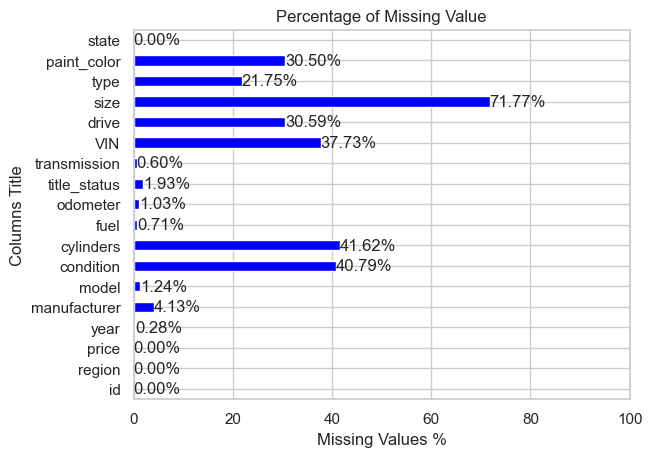

<Figure size 4000x2000 with 0 Axes>

In [93]:
# Display the percentage of missing values in each column
visualize_missing_values(used_car_data)

#Drop irrelevant columns 'id', 'region', 'VIN' columns for price computation
used_car_data.drop(columns=['id','region','VIN'],inplace=True)

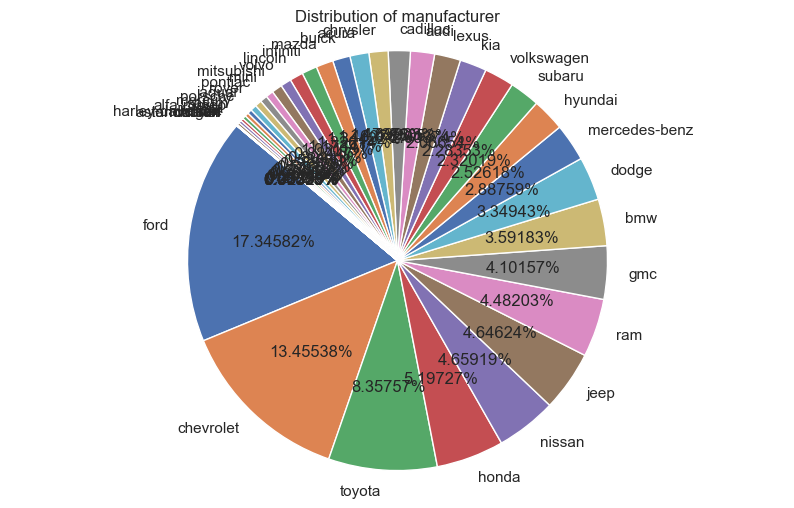

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64


In [94]:
# Distribution of Car manufacturer
draw_distribution_chart(used_car_data,'manufacturer')

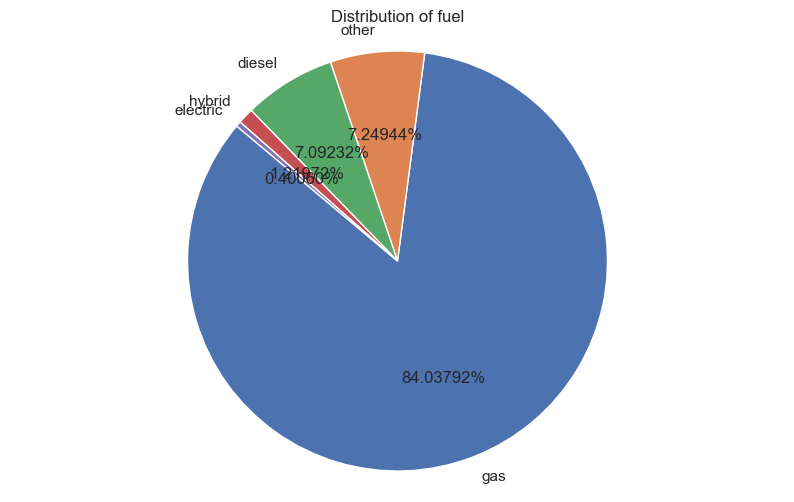

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64


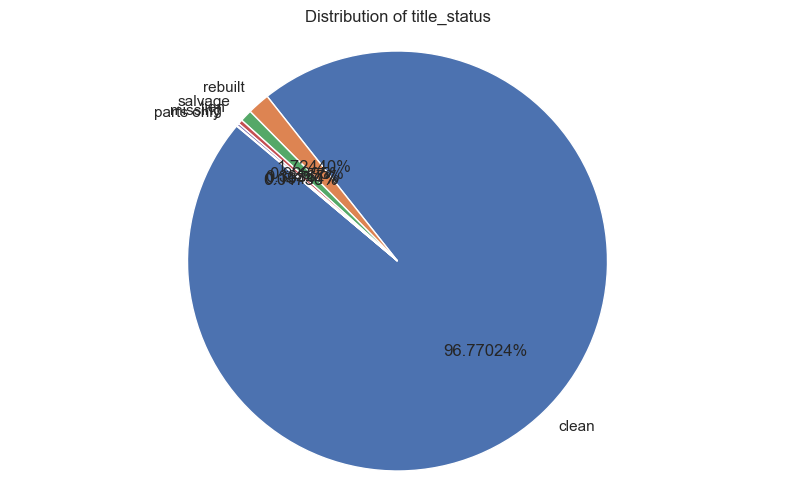

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64


In [95]:
# draw distribution chart for  model
#draw_distribution_chart(used_car_data,'model')
#Too many values and data clean up is required before visualizing. 

# draw distribution chart for  Fuel 
draw_distribution_chart(used_car_data,'fuel')

#draw distribution chart for title_status
draw_distribution_chart(used_car_data,'title_status')


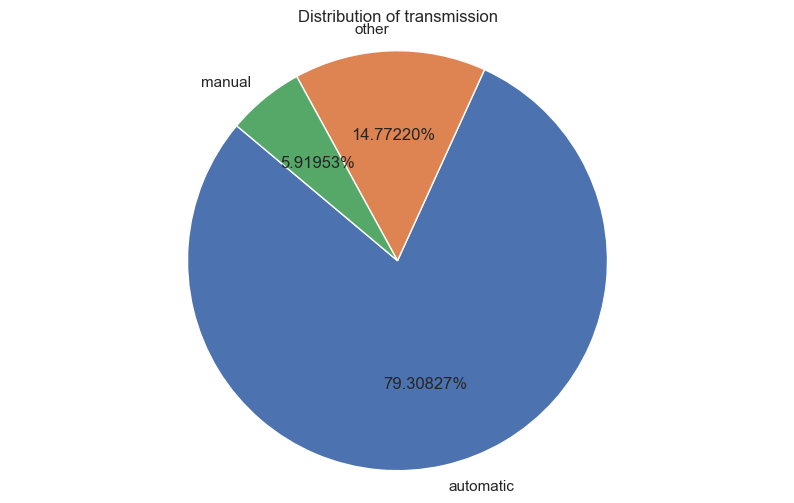

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64


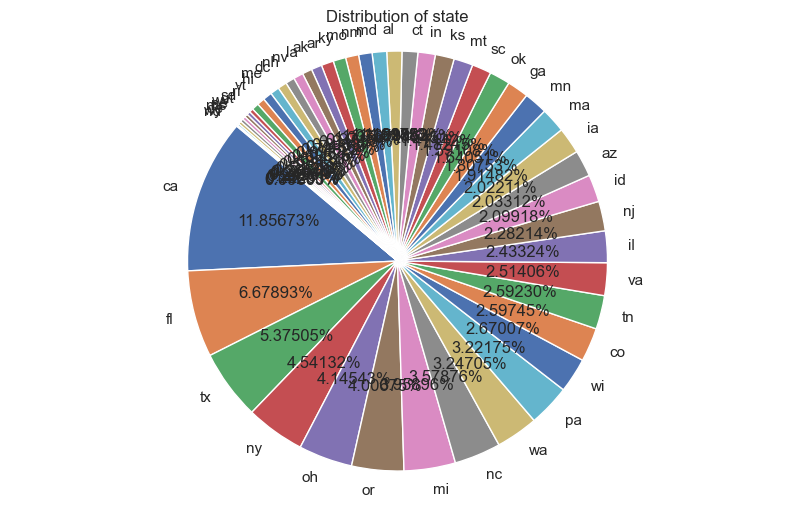

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
Name: count, dtype: int64


In [96]:
#draw a pie chart to show the distribution of transmission and state
draw_distribution_chart(used_car_data,'transmission')
draw_distribution_chart(used_car_data,'state')


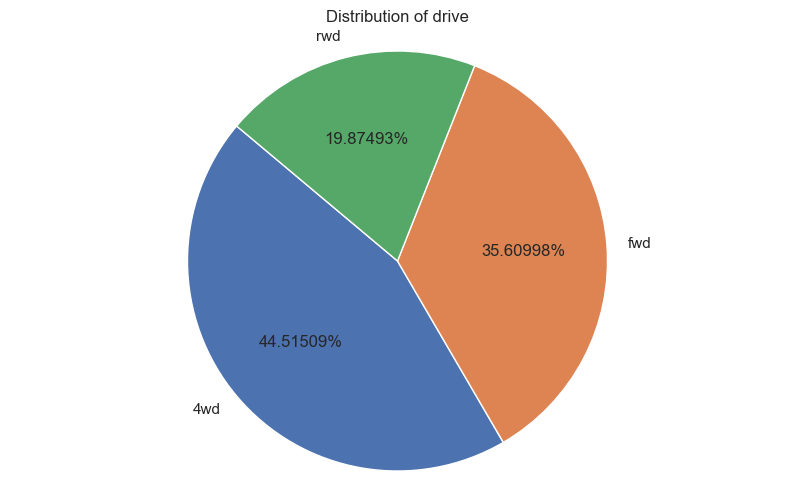

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64


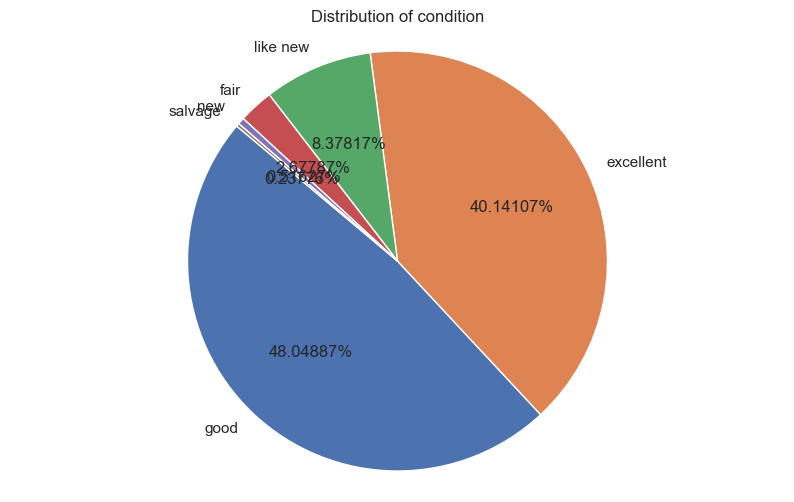

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


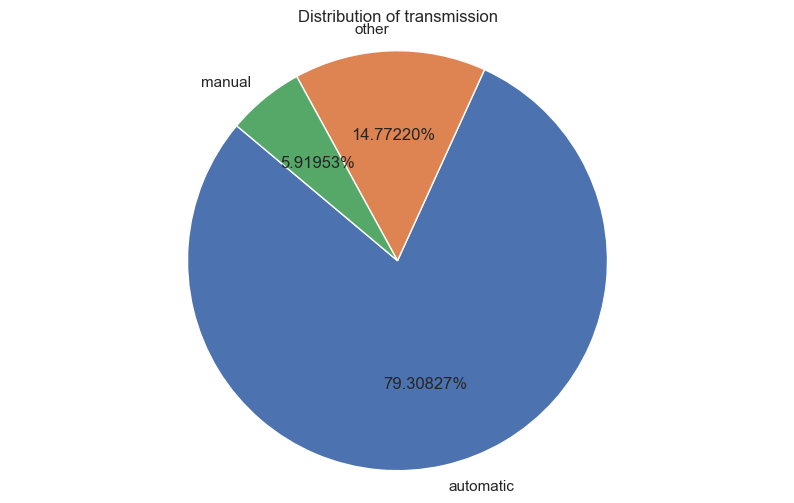

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64


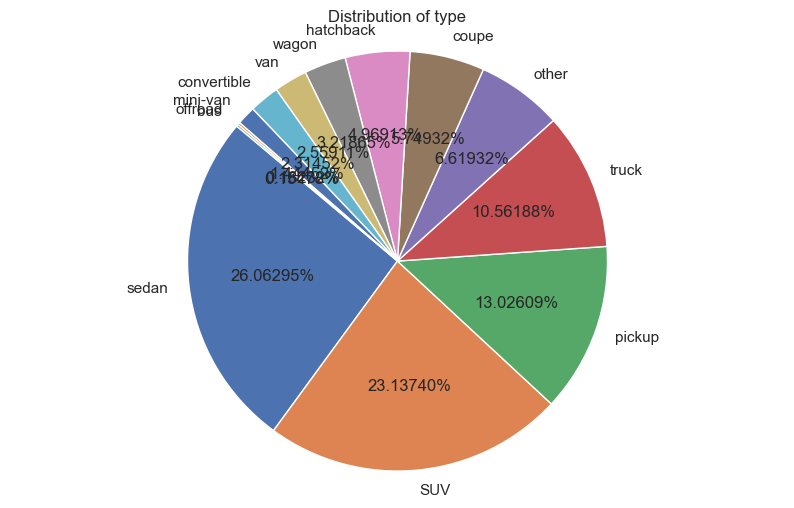

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
Name: count, dtype: int64


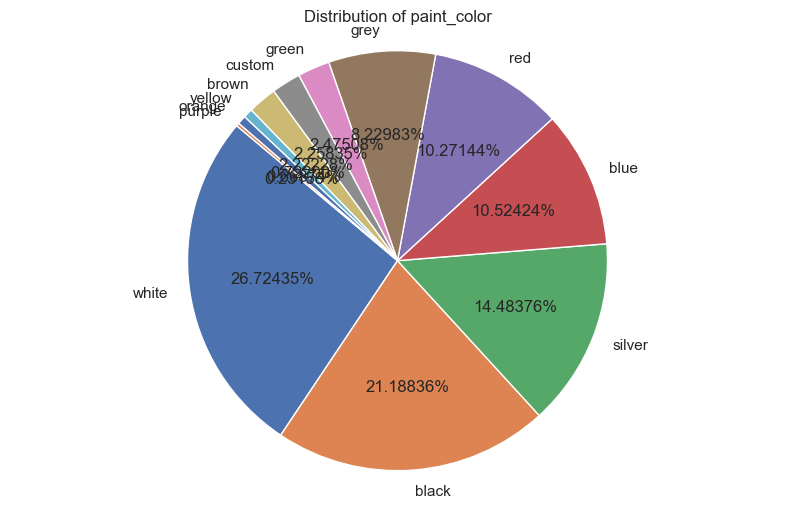

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
Name: count, dtype: int64


In [97]:
# Distribution of Car drive
draw_distribution_chart(used_car_data,'drive')
# Distribution of Car condition
draw_distribution_chart(used_car_data,'condition')
# Distribution of Car transmission
draw_distribution_chart(used_car_data,'transmission')
# Distribution of Car type
draw_distribution_chart(used_car_data,'type')
# Distribution of Car paint_color
draw_distribution_chart(used_car_data,'paint_color')



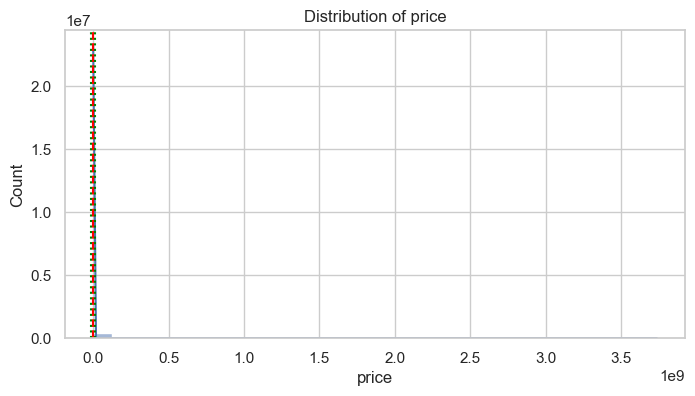

Mean: 75199.03 Standard Deviation: 12182267.90 Max: 3736928711.00 Min: 0.00
Number of Outliers: 28


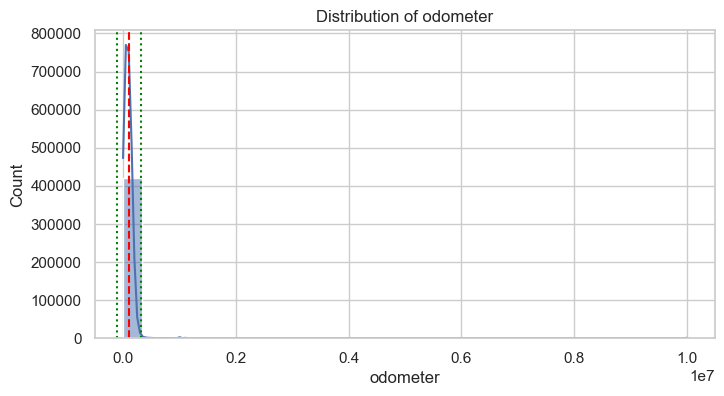

Mean: 98043.33 Standard Deviation: 213881.25 Max: 10000000.00 Min: 0.00
Number of Outliers: 2731


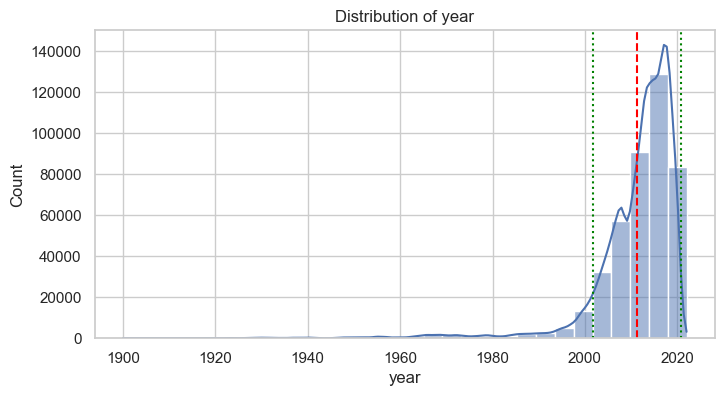

Mean: 2011.24 Standard Deviation: 9.45 Max: 2022.00 Min: 1900.00
Number of Outliers: 2529


In [98]:
def distribution_chart_for_numerical(df, column):
    mean_val = np.mean(df[column])
    std_val = np.std(df[column])
    max_val = np.max(df[column])
    min_val = np.min(df[column])
    plt.figure(figsize=(8,4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(mean_val + std_val, color='green', linestyle=':', label=f'$\pm$ 1 Std Dev')
    plt.axvline(mean_val - std_val, color='green', linestyle=':')
    plt.title(f'Distribution of {column}')
    plt.show()
    print(f"Mean: {mean_val:.2f} Standard Deviation: {std_val:.2f} Max: {max_val:.2f} Min: {min_val:.2f}")
    print(f"Number of Outliers: {len(df[df[column] > mean_val + std_val])}")

# Visualize the distribution of the 'price' column
distribution_chart_for_numerical(used_car_data,'price')
# price has bad distribution. need cleaning

# Visualize the distribution of the 'odometer' column
distribution_chart_for_numerical(used_car_data,'odometer')
# odometer has bad distribution. Most of 

# Visualize the distribution of the 'year' column
distribution_chart_for_numerical(used_car_data,'year')
# year has bad distribution. need cleaning

**Data Understanding Summary**

*Top Selling used cars*
1.	Missing values more than 5% in these columns paint_color, type, size, drive, VIN, cylinders, and condition.
2.	Data Skew: Though data exist from 1900, data is skewed towards 2000 to 2024. Similarly, odometer skewed below 100000 miles. 
3.	Price and odometer distribution is not correct due to data issues.
4.	Model of the car distribution is not achieved due to high number of variances.

| Features | Topper contributing above 50% distribution | Observation |
|---|---|---|
| Manufacturer | Ford (17.3%)<br>Chevrolet (13.5%)<br>Toyota (8.3%)<br>Honda (5.2%)<br>Nissan (4.65%)<br>Jeep (4.65%) | Top selling used cars from Ford, Chevrolet, Toyota brands/manufacturer. |
| Fuel Type | Gas 84% | Gas cars are top in resale. However, the increase in Electric / hybrid car sales which is something has to be monitored. |
| Title status | Clean 96.7% | Buyers wish to buy clean title cars which is 96.7% market cap. The car price slightly reduces based other than clean title. |
| Transmission | Automatic 79% | Automatic transmission used cars are having 79% market cap. |
| Car Drive | 4wd (44.5%)<br>Fwd (35.6%)<br>Rwd(19.87%) | 4wd and FWD are most selling. Rwd also holds approx. 20% market. |
| States | CA (11.85%),<br>Fl (6.67%)<br>TX (4.5%) | The sales is almost equally distributed in states. Top 3 used car selling states are CA, FL, TX. |
| Condition | Good (48%)<br>Excellent (40%) | Good and Excellent condition cars are selling with market cap 88%. |
| Type of Car | Sedan (26%)<br>SUV (23%)<br>Pickup (13 %)<br>Truck (10.56%) | Sedan, SUV, Pickup, and Truck are selling with market cap 70% |
| Color of the car | White (26.7%)<br>Black (21.1%)<br>Silvar (14.4%)<br>Blue (10.5%) | White, Black, Silver and Blue are selling with market cap 71%





### Data Preparation

***Data Cleaning***
1. Numerical Data clean up: Price and odometer need clean up like removing non numerical characters. round off to nearest 100.
2. Round off odometer to nearest 1000 
3. Remove more than 5% missing value columns before dropna() call to get maximum rows in population. Disadvantage of this approach, we will miss critical features in modeling. 
    E.g. paint_color, type, size, drive, cylinders, and condition
4. Drop all the rows which has missing values.

***Data Transformation and Filtering***
1. Instead of Year, compute age of the vehicle column to use in below analysis. Drop year column.  
2. Filter out < $1500 car price and age greater than 15 to achieve better model performance based on the data exploration.
3. Filter out odometer mileage greater than 150000.
4. Remove outliers using the zscore technique.
5. Clean model and manufacturer columns by removing special characters. Create new feature model_cleaned by combining model and manufacturer.

***Data Encoding***
1. Encode categorical variables using one-hot encoding.
2. Scale numerical variables using standardization.
3. Use Elbow technique with KMeans++, find the grouping for odometer, price and age combination. 
4. Identify the best PCA components to use in the model.

The shape of the DataFrame after removing missing values: (389604, 9)
Post removing >5% missing values columns


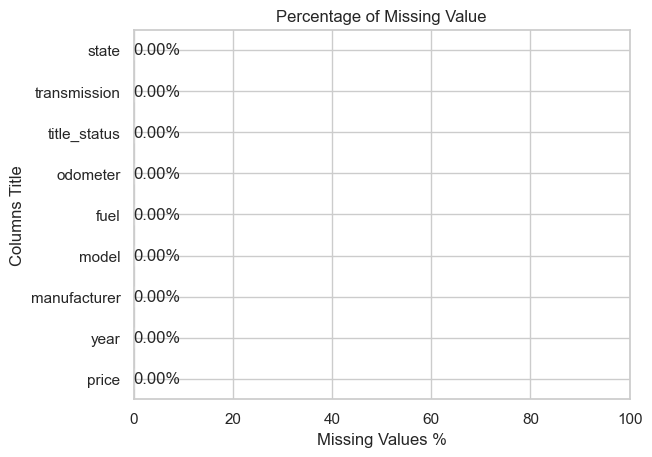

<Figure size 4000x2000 with 0 Axes>

In [99]:
#Data Cleaning:
cleansed_data = used_car_data.copy()

# 1. Clean the 'price' column by removing '$' and ',' and converting to float, and round off to nearest 100
cleansed_data['price'] = cleansed_data['price'].astype(str).str.replace('[$,]', '', regex=True).astype(float)
cleansed_data['price'] = pd.to_numeric(cleansed_data['price'], errors='coerce')
cleansed_data['price'] = cleansed_data['price'].round(-2)

#2. Clean the 'odometer' column by removing ',' and converting to float and round off to nearest 1000
cleansed_data['odometer'] = cleansed_data['odometer'].astype(str).str.replace('[,]', '', regex=True).astype(float)
cleansed_data['odometer'] = pd.to_numeric(cleansed_data['odometer'], errors='coerce')
cleansed_data['odometer'] = cleansed_data['odometer'].round(-3)

# 3.  Missing values <5% is tolerable limit
cleansed_data.drop(columns=['paint_color', 'type', 'size', 'drive','cylinders', 'condition'],inplace=True)

#4. Remove rows with missing values and check the new shape
cleansed_data.dropna(inplace=True)

print(f"The shape of the DataFrame after removing missing values: {cleansed_data.shape}")
print("Post removing >5% missing values columns")
visualize_missing_values(cleansed_data)


In [100]:
#Data Filtering and Transformation

#1. Instead of Year, compute age of the vehicle column to use in below analysis. Drop year column.  
cleansed_data['age'] = cleansed_data['year'].apply(lambda x: datetime.now().year - x if pd.notnull(x) else x)
cleansed_data.drop(columns=['year'],inplace=True)


Number of cars after price filter: 348055


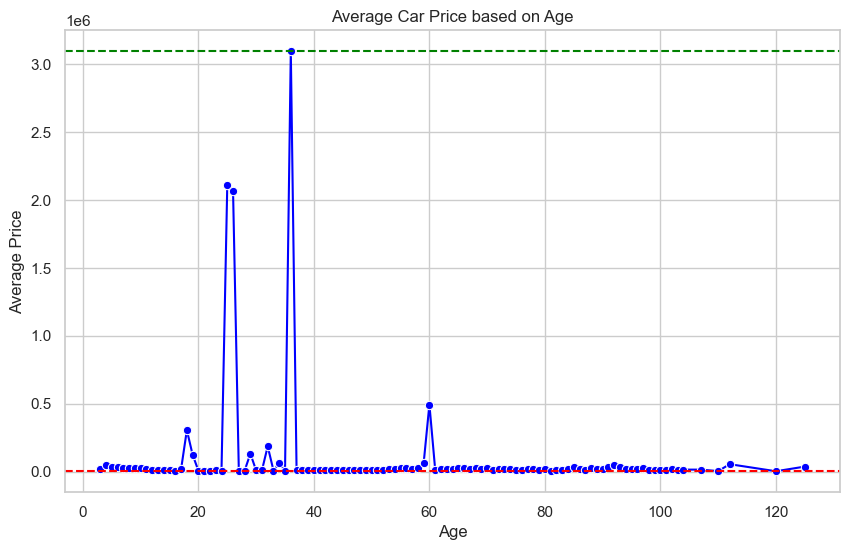


Number of cars after age filter: 258183


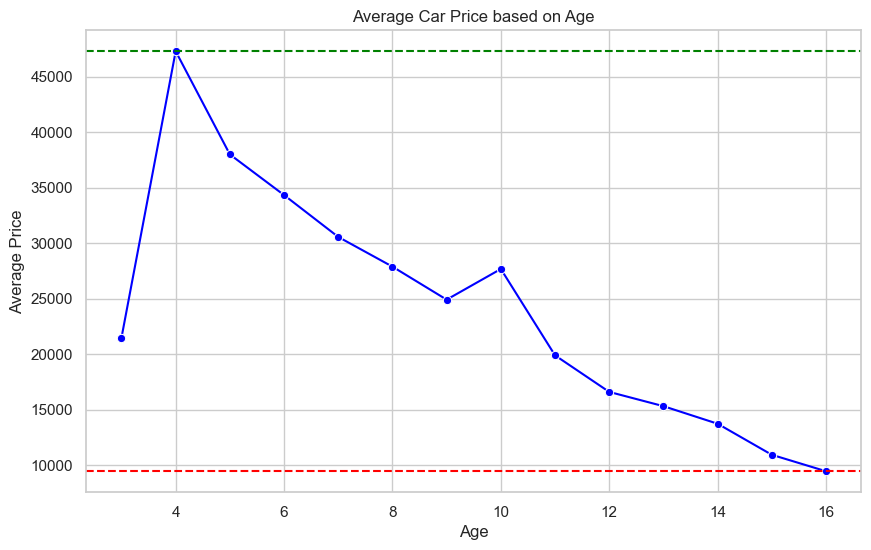

The minimum average price is 9461 in age 16.00
The maximum average price is 47275 in age 4.0
Average price is not normally distributed. Future engineering has to be done to make it normally distributed to get better accuracy.
Age filter applied to 16 to get the data to be normally distributed


In [101]:
#2 Filter price data, age data and visualize [Data transformation and filtering]

#1. filter out < $1500 car price
price_filter = cleansed_data['price'] >= 1500

cleansed_data = cleansed_data[price_filter]
print(f"\nNumber of cars after price filter: {len(cleansed_data)}")

#2. Visualize average based on age of the car
age_mean=cleansed_data.groupby('age').price.mean()
minSalePrice, maxSalePrice, minYearSales, maxYearSales=age_mean.min(), age_mean.max(), age_mean.idxmin(), age_mean.idxmax()
plt.figure(figsize=(10,6))
ax=sns.lineplot(x='age', y='price', data=age_mean.reset_index(), marker='o',color='blue')
ax.axhline(minSalePrice, color='red', linestyle='--', label=f'Min: {minYearSales}')
ax.axhline(maxSalePrice, color='green', linestyle='--', label=f'Max: {maxYearSales}')
plt.title('Average Car Price based on Age')
plt.xlabel('Age')
plt.ylabel('Average Price')
plt.show()

#3. Based on the above plot, filter out the data where age greater than 20
age_filter = cleansed_data['age'] <= 16
cleansed_data = cleansed_data[age_filter]
print(f"\nNumber of cars after age filter: {len(cleansed_data)}")

age_mean=cleansed_data.groupby('age').price.mean()
minSalePrice, maxSalePrice, minYearSales, maxYearSales=age_mean.min(), age_mean.max(), age_mean.idxmin(), age_mean.idxmax()
plt.figure(figsize=(10,6))
ax=sns.lineplot(x='age', y='price', data=age_mean.reset_index(), marker='o',color='blue')
ax.axhline(minSalePrice, color='red', linestyle='--', label=f'Min: {minYearSales}')
ax.axhline(maxSalePrice, color='green', linestyle='--', label=f'Max: {maxYearSales}')
plt.title('Average Car Price based on Age')
plt.xlabel('Age')
plt.ylabel('Average Price')
plt.show()


# 4. Check average price based on age of the car
minSalePrice, maxSalePrice, minYearSales, maxYearSales=age_mean.min(), age_mean.max(), age_mean.idxmin(), age_mean.idxmax()
print(f"The minimum average price is {minSalePrice:.0f} in age {minYearSales:.2f}")
print(f"The maximum average price is {maxSalePrice:.0f} in age {maxYearSales}")
print("Average price is not normally distributed. Future engineering has to be done to make it normally distributed to get better accuracy.")
print("Age filter applied to 16 to get the data to be normally distributed")

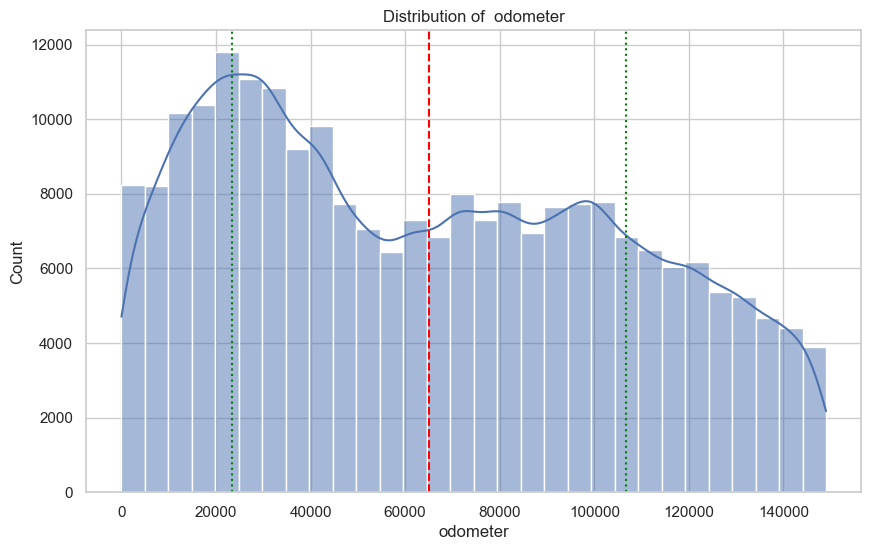


Number of cars after odometer filter: 227388


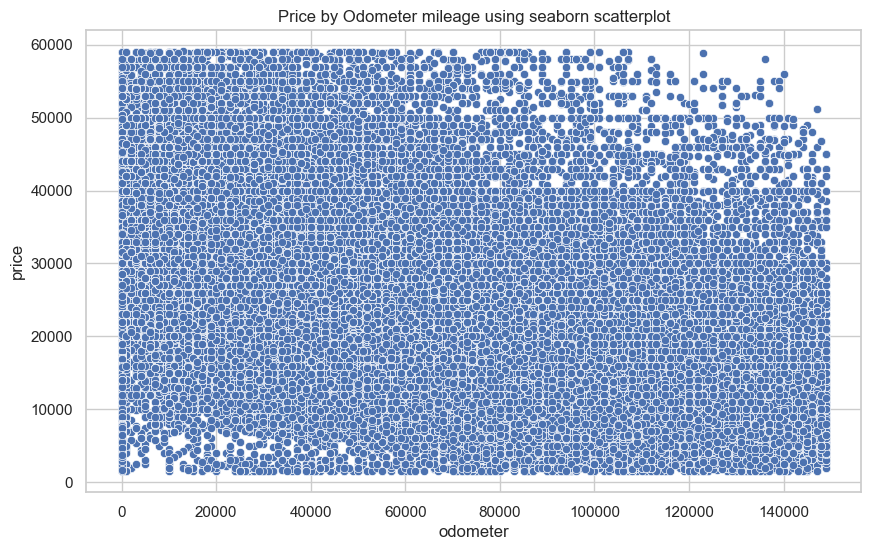

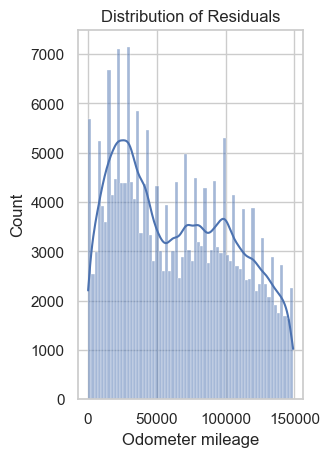

In [121]:
# Analyze odometer data  and filter out < 150000 mileage

# 1. distribution plot for car odometer
mean_val = np.mean(cleansed_data['odometer'])
std_val = np.std(cleansed_data['odometer'])
plt.figure(figsize=(10, 6))
sns.histplot(cleansed_data['odometer'], kde=True, bins=30)
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(mean_val + std_val, color='green', linestyle=':', label=f'$\pm$ 1 Std Dev')
plt.axvline(mean_val - std_val, color='green', linestyle=':')
plt.title('Distribution of  odometer')
plt.show()

# 2. filter out < $1500 car price
odometer_filter = cleansed_data['odometer'] < 150000
cleansed_data = cleansed_data[odometer_filter]
print(f"\nNumber of cars after odometer filter: {len(cleansed_data)}")

# 3. scatter plot of price vs odometer 
plt.figure(figsize=(10, 6))
sns.scatterplot( x='odometer', y='price', data=cleansed_data, palette="bright")
plt.title('Price by Odometer mileage using seaborn scatterplot')
plt.show()


Original unique models: 12474
Cleaned unique models: 5810


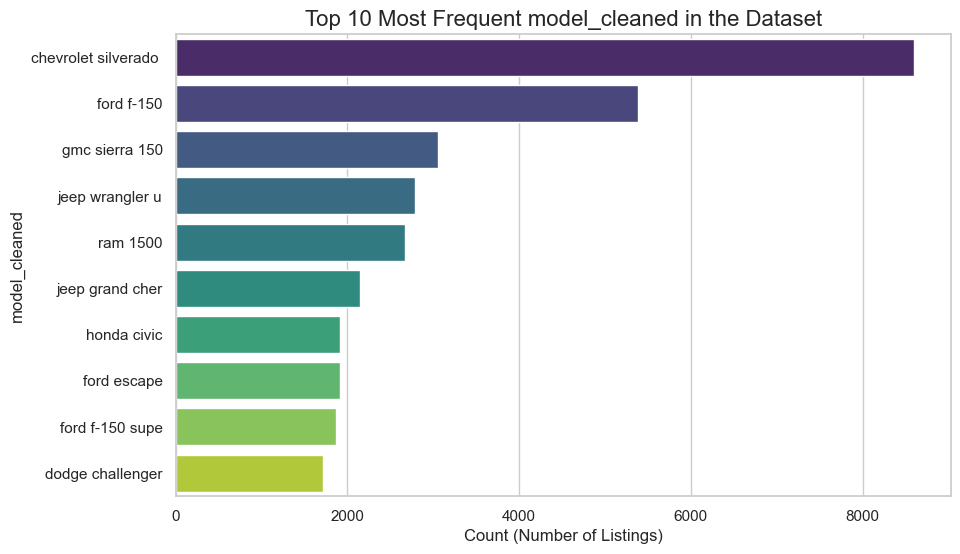

In [103]:
# Clean the model and manufacturer column and create a new column called model_cleaned

# 1. Convert everything to lowercase
cleansed_data['model_cleaned'] = cleansed_data['model'].str.lower()
cleansed_data['manufacturer'] = cleansed_data['manufacturer'].str.lower()

# 2. Remove leading/trailing whitespaces
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.strip()
cleansed_data['manufacturer'] = cleansed_data['manufacturer'].str.strip()

# 3. Remove common punctuation and symbols (optional, but helpful)
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('[^\w\s]', '', regex=True) # Keeps letters, numbers, spaces
cleansed_data['manufacturer'] = cleansed_data['manufacturer'].str.replace('[^\w\s]', '', regex=True) # Keeps letters, numbers, spaces

# 4. Remove common redundant words or phrases
# E.g., remove "sedan", "suv", "4x4", "trim", "edition" if they aren't necessary
redundant_terms = ['sedan', 'suv', 'truck', '4x4', 'awd', 'fwd', 'rwd', 'ltd',
                   'xlt', 'sxt', 'lx', 'ex', 'edition', 'trim', 'sport', 'utility',
                   'mechanical', 'model', 'series', 'package', 'pkg', 'type', 'version', 'style', 'count']

for term in redundant_terms:
    # Use word boundaries (\b) to avoid removing parts of other words (e.g., 'port' from 'sportage')
    cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace(rf'\b{term}\b', '', regex=True)

# 5. Collapse multiple spaces into a single space
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace(r'\s+', ' ', regex=True)
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.strip()
cleansed_data['manufacturer'] = cleansed_data['manufacturer'].str.replace(r'\s+', ' ', regex=True)

# 6. Handle specific inconsistencies/typos (Manual Correction)
# Example: If people type 'f150' and 'f-150', standardize it
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('f150', 'f-150')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('silverado1500', 'silverado 1500')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('accordlx', 'accord lx')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('camryse', 'camry se')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('civicex', 'civic ex')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('grandcherokee', 'grand cherokee')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('mustanggt', 'mustang gt')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('explorerxlt', 'explorer xlt')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('crv', 'cr-v')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('wranglerunlimited', 'wrangler unlimited')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('foresterxt', 'forester xt')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('focustitanium', 'focus titanium')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('imprezawsport', 'impreza wsport')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('rav4xle', 'rav4 xle')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('tacoma4x4', 'tacoma 4x4')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('altima25s', 'altima 2.5s')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('malibults', 'malibu lts')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('silverado2500hd', 'silverado 2500hd')
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].str.replace('f-150xlt', 'f-150 xlt')
# continue to improve the list ...

# 7. shorten long model names
def shorten_string_trunc(text, max_len=20):
    if len(text) > max_len:
        return text[:max_len]
    return text.strip()

cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].astype(str)
cleansed_data['model_cleaned'] = cleansed_data['model_cleaned'].apply(lambda x: shorten_string_trunc(x, max_len=10))

# 8. Combine manufacturer and cleaned model for better uniqueness
cleansed_data['model_cleaned'] = cleansed_data['manufacturer'] + ' ' + cleansed_data['model_cleaned']

# Check the unique counts after cleaning
print(f"Original unique models: {cleansed_data['model'].nunique()}")
print(f"Cleaned unique models: {cleansed_data['model_cleaned'].nunique()}")

def plot_top_10(df, column):
    ### Plot the top 10 most frequent car models in the dataset ###
    # 1. Calculate the top 10 models
    # value_counts() counts occurrences, head(10) selects the top 10
    top_10_models = df[column].value_counts().head(10)

    # 2. Extract the index (model names) for plotting order
    top_10_names = top_10_models.index

    # 3. Create the plot using Seaborn countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df,order=top_10_names,palette='viridis') 

    plt.title(f'Top 10 Most Frequent {column} in the Dataset', fontsize=16)
    plt.xlabel('Count (Number of Listings)', fontsize=12)
    plt.ylabel(f'{column}', fontsize=12)
    plt.show()
    
#Plot the top 10 most frequent car models in the dataset
plot_top_10(cleansed_data, 'model_cleaned')

In [104]:
#4. Remove outliers [ Data Transformation and filtering]
print (f" Before Score clean up: {cleansed_data.shape}")
cleansed_data = remove_outliers_by_zscore(cleansed_data, threshold=3, columns=['price', 'odometer'])  
print (f" After Score clean up: {cleansed_data.shape}")

 Before Score clean up: (232858, 10)
Checking for outliers in columns: ['price', 'odometer']
 After Score clean up: (227388, 10)


<Figure size 1000x600 with 0 Axes>

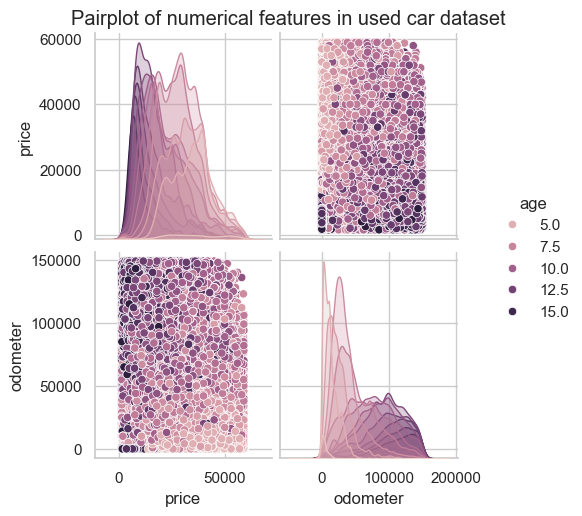

<Figure size 1000x600 with 0 Axes>

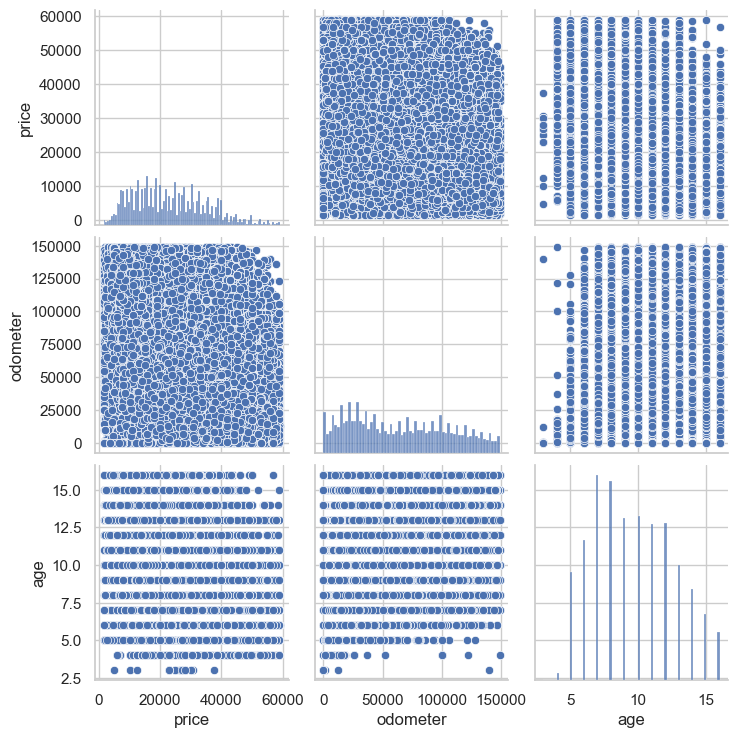

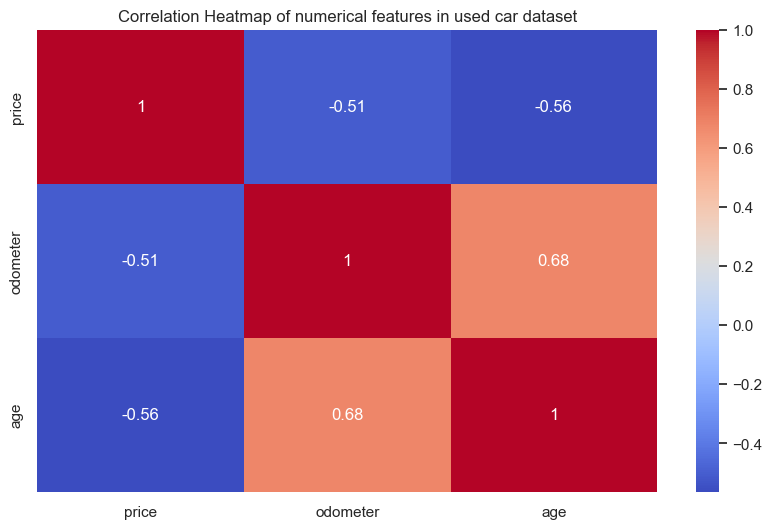

In [105]:
# Analyze the relationship between features odometer, price and age

#1. Pairplot of numerical features in used car dataset
plt.figure(figsize=(10,6))
sns.pairplot(cleansed_data[['age','price','odometer']], hue = 'age', diag_kind='kde')
plt.suptitle("Pairplot of numerical features in used car dataset", y=1.02)
plt.show()

#2. Pairplot with nemerical without hue
plt.figure(figsize=(10,6))
sns.pairplot(cleansed_data[['price','odometer','age']])
plt.show()

# 3. Correlation heatmap of numerical features in used car dataset
plt.figure(figsize=(10,6))
num_df=cleansed_data.select_dtypes(include=['number'])
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of numerical features in used car dataset")
plt.show()




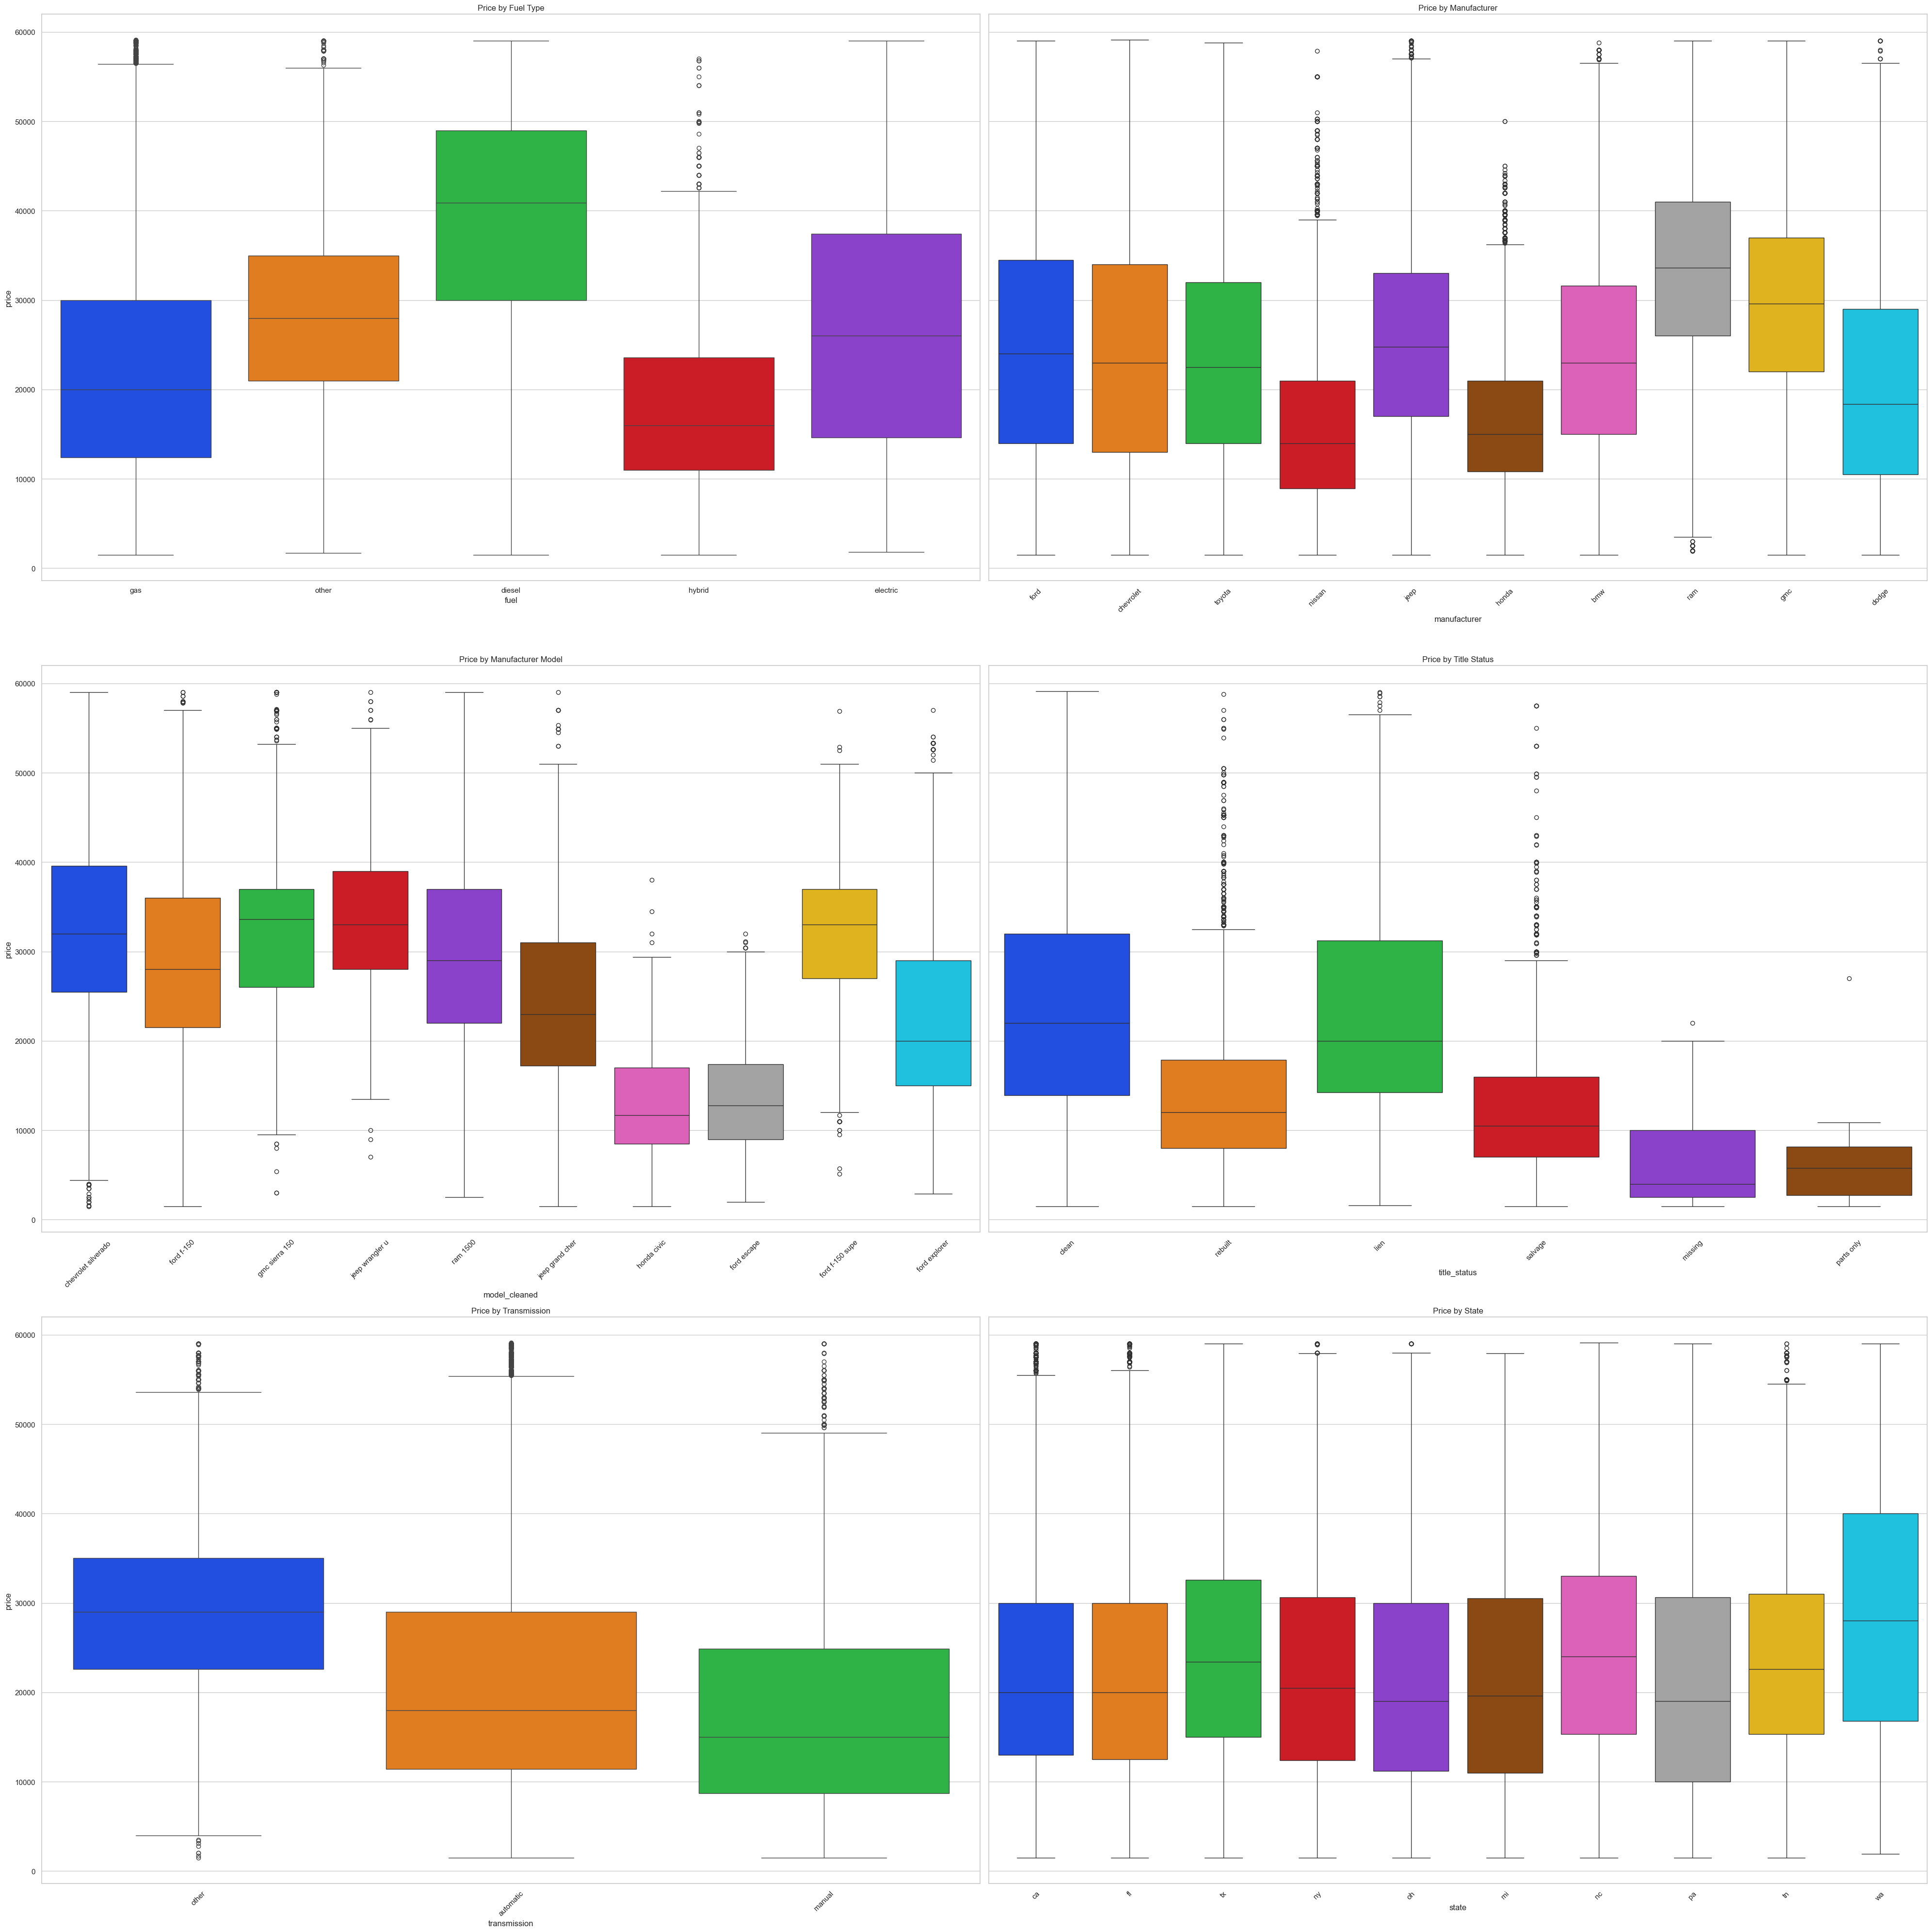

In [106]:
# Boxplots of categorical features vs. price using sample data
fig, axes = plt.subplots(3, 2, figsize=(40, 40), sharey=True)
axes = axes.flatten()

# Plot 'fuel' on the first axis
sns.boxplot(ax=axes[0], x='fuel', y='price', data=cleansed_data, palette="bright")
axes[0].set_title('Price by Fuel Type')
axes[0].tick_params(axis='x')

# Plot 'odometer' on the second axis
top10_manufacturers = cleansed_data['manufacturer'].value_counts().nlargest(10).index
sns.boxplot(ax=axes[1], x='manufacturer', y='price', data=cleansed_data, palette="bright", order=top10_manufacturers)
axes[1].set_title('Price by Manufacturer')
axes[1].tick_params(axis='x', rotation=45)

# Plot 'model_cleaned' on the second axis
top10_models = cleansed_data['model_cleaned'].value_counts().nlargest(10).index
sns.boxplot(ax=axes[2], x='model_cleaned', y='price', data=cleansed_data, palette="bright", order=top10_models)
axes[2].set_title('Price by Manufacturer Model')
axes[2].tick_params(axis='x', rotation=45)

#plot title_status on the fourth axis
sns.boxplot(ax=axes[3], x='title_status', y='price', data=cleansed_data, palette="bright")
axes[3].set_title('Price by Title Status')
axes[3].tick_params(axis='x', rotation=45)

#plot transmission on the fifth axis
sns.boxplot(ax=axes[4], x='transmission', y='price', data=cleansed_data, palette="bright")
axes[4].set_title('Price by Transmission')
axes[4].tick_params(axis='x', rotation=45)

#plot state on the ninth axis
top10_states = cleansed_data['state'].value_counts().nlargest(10).index
sns.boxplot(ax=axes[5], x='state', y='price', data=cleansed_data, palette="bright", order=top10_states)
axes[5].set_title('Price by State')
axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


[682164.0000000009, 323848.6729085432, 254916.2525035697, 210669.32594299893, 178150.33136656834, 156435.88196809537, 142856.91526615052, 134282.691391341, 125039.79919687504, 113434.52109042887, 107824.66136395931, 100986.43735583732, 95991.91137995527, 91589.91252039513]


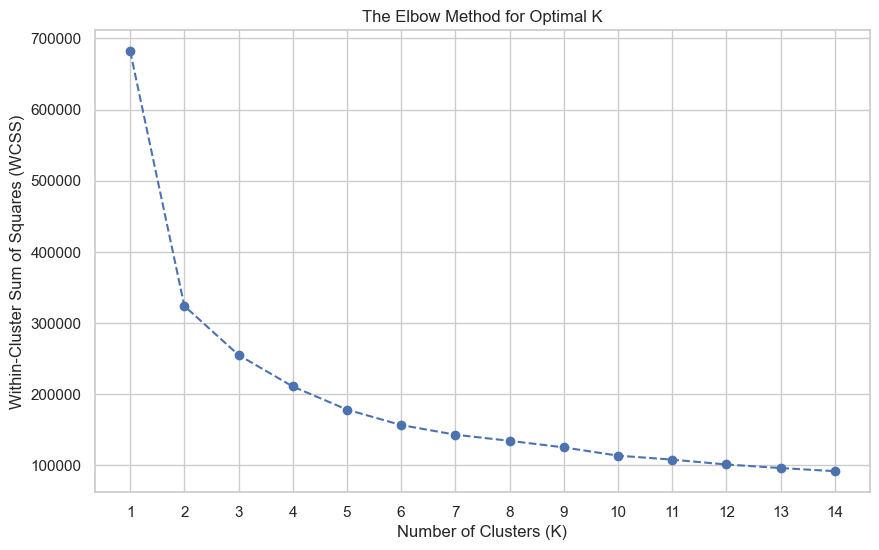

Number of models in each cluster: 
cluster_label
0    117580
1    109808
Name: count, dtype: int64


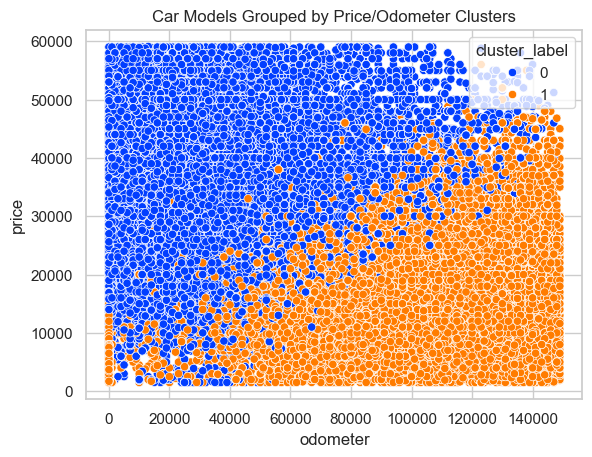

In [107]:
# Kmeans and group the data with price, age, odometer

# 1. Select the features you want to use for grouping (must be numerical)
features_for_clustering = cleansed_data[['price','age','odometer']]

# 2. Standardize the data (crucial for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# 3.check WCSS for different number of clusters to use Elbow method
wcss=[]
for i in range(1, 15):
 kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++')
 kmeans.fit(features_scaled)
 wcss.append(kmeans.inertia_)

print(wcss)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

# 5. Based on the elbow plot, choose the optimal number of clusters (e.g., 6)
kmeans = KMeans(n_clusters=2, random_state=42, init='k-means++')
kmeans.fit(features_scaled)
cleansed_data['cluster_label'] = kmeans.labels_

# 6. Analyze the results visually
print(f"Number of models in each cluster: \n{cleansed_data['cluster_label'].value_counts()}")

sns.scatterplot(data=cleansed_data, x='odometer', y='price', hue='cluster_label', palette='bright')
plt.title('Car Models Grouped by Price/Odometer Clusters')
plt.show()


In [108]:
# encode categorical data  to numerical data
numerical_data = cleansed_data.copy()

# 1. Encode categorical variables using category codes
categorical_cols = numerical_data.select_dtypes(include=['object','string']).columns
for col in categorical_cols:
    numerical_data[col] = numerical_data[col].astype('category').cat.codes
    numerical_data[col] = numerical_data[col].astype('int64')

#2. using categorial encoded data to get summary statistics
print(summary_stats(numerical_data))

                 dtype  sample_val    vals  miss_pct  unique      mean  \
price          float64      7500.0  227388       0.0     572  23072.34   
manufacturer     int64        12.0  227388       0.0      40     17.75   
model            int64      7360.0  227388       0.0   11941   6114.73   
fuel             int64         2.0  227388       0.0       5      2.14   
odometer       float64     99000.0  227388       0.0     150  65027.33   
title_status     int64         0.0  227388       0.0       6      0.14   
transmission     int64         2.0  227388       0.0       3      0.53   
state            int64        10.0  227388       0.0      51     23.65   
age            float64         8.0  227388       0.0      14      9.68   
model_cleaned    int64      4701.0  227388       0.0    5605   2717.37   
cluster_label    int32         0.0  227388       0.0       2      0.48   

                  mode     min       max       std  skew  kurtosis  
price          20000.0  1500.0   59100.0  

[-1.37991307e-16  6.09961572e-17 -4.44971967e-17 -7.09955273e-17
 -6.49959053e-17  5.99962202e-18 -3.94975117e-17  6.39959682e-17
 -2.69982991e-16 -1.04993385e-17 -6.49959053e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


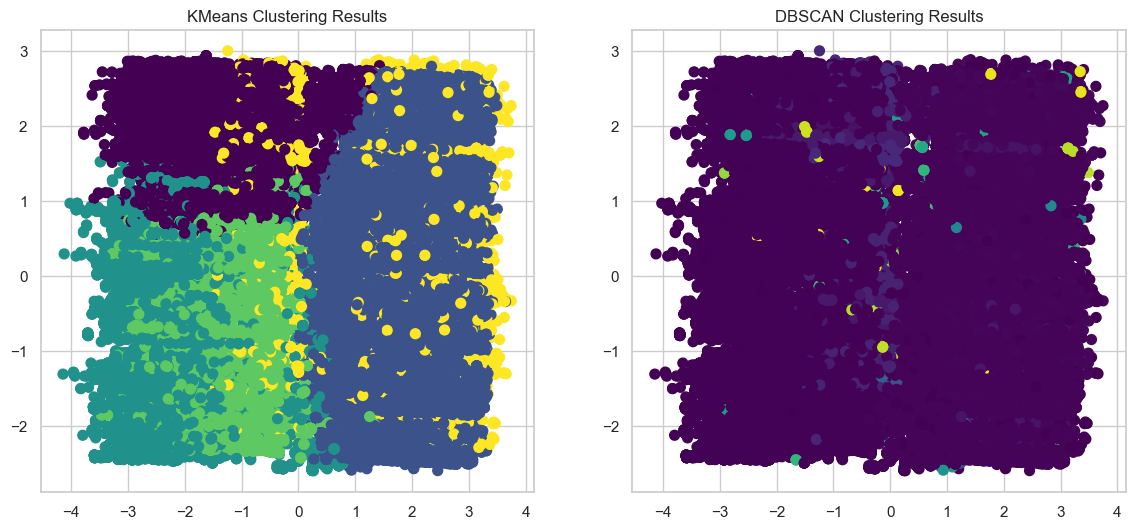

In [109]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
print(scaled_data.mean(axis=0))
print(scaled_data.std(axis=0))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

# Visualize the clustering results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering Results')

plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', s=50)

plt.title('DBSCAN Clustering Results')
plt.show()

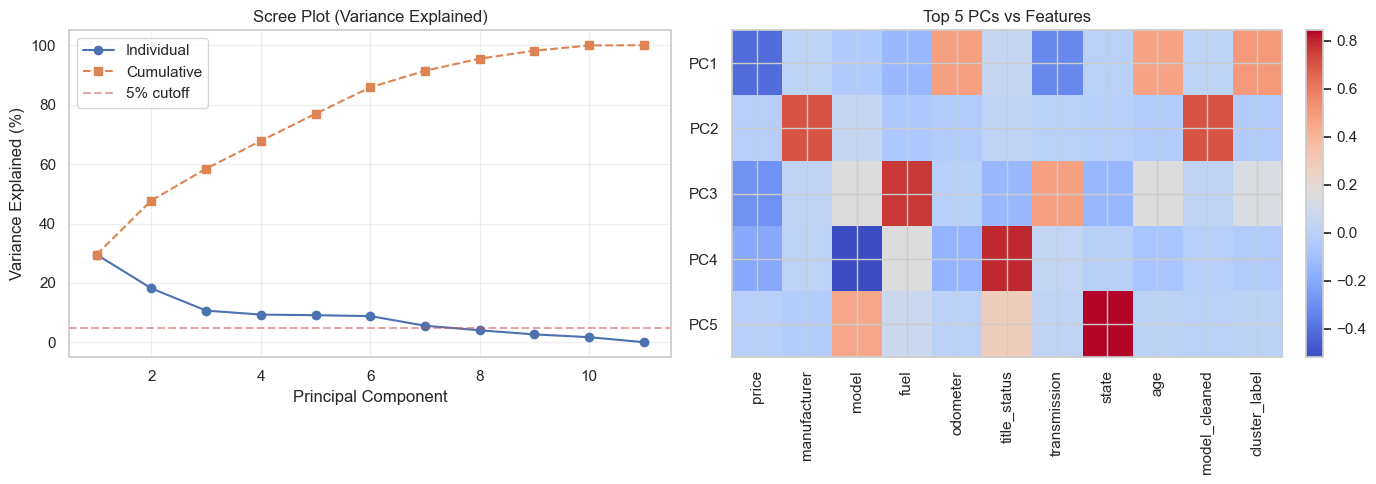

Metric                              Value
0   Total Variance Explained                             100.0%
1       PCs for 80% Variance                                  6
2       PCs for 95% Variance                                  8
3  Strong PCs (>5% var each)                                  7
4             Recommendation  Add <=6 PCs as new features only.

In [110]:

# PCA Visualization
pca_recommendation_visualization(numerical_data, scale_data=True, top_n_pc=5)


***Data Preparation Summary:***

1.	Feature Engineering:

| Description | Value |
|---|---|
| Original Data size | 426880 |
| After removing >5% data missing columns and missing values in rows | 389604 |
| With price filter > 1500 $ | 348055 |
| With age filter < 16 | 258183 |
| With odometer filter <100000 | 232858 |
| With ZScore filter | 227388 |

2.	Car model is reduced from 12474 to 5810. 

| Model Topper in category |
|---|
| Chevrolet Silverado |
| Ford 150 |
| GMC Sierra |
| Jeep Grand Cherokee |
| Honda Civic |


**Analyzing Relationship**
1.	Odometer mileage typically increase when car aged.
2.	Car price decreases based on age and odometer mileage increase
3.	Cars with >35 years are high demand (considered vintage cars) and price increases
4.	Gas car sells average of 15K with max 50K. However, electric and diesel cars average price is above 20000.
5.	Top reselling Ford, Chevrolet, gmc and Toyoto average price is below 20000.
6.	 Other than clean and lien title average price is less than 20000.

**Scale the data**
1. 11 group is possible for the combination of price, odometer, and age.
2. Number of clusters is 2
3. PCA components 7 from scaled data.


### Modeling

Use following techniques to build models.

1.	PolynomialFeatures: The data is first transformed (e.g., creating interaction terms).
2.	StandardScaler (Here): The features (including the new polynomial ones) are scaled to mean=0, std=1.
3.	SelectFromModel: This feature selection step (using Lasso's coefficients to decide importance) requires standardized data to work correctly and consistently. Lasso's regularization is sensitive to feature scale.
4.	Ridge: The final model is trained on the scaled and selected features. Ridge regression is a regularization technique used in linear regression models to prevent overfitting and improve model stability, especially when dealing with data that has many features or features that are highly correlated with each other
5.	GridSearchCV: This is used to find the best hyperparameters for the Ridge model. It does this by trying out different combinations of hyperparameters and selecting the one that gives the best performance on the validation set.

Steps:
1. Try with LinearRegression just using numeric features.
2. Try with LinearRegression using numeric features and polynomial features.
3. Try with Ridge using numeric features and polynomial features.
4. Try with Ridge using numeric features, polynomial features and selectfrommodel.
5. Try with Ridge using numeric features, polynomial features and selectfrommodel and cross validation.
6. Try with Ridge using numeric features, polynomial features and selectfrommodel and cross validation and grid search.


In [111]:

# Model 1: Linear Regression with only numerical columns

# 1. create Linear Regression using only actual numerical fields like odometer, and age
linearmodel_numerical = LinearRegression()
features= ['odometer','age']
linearmodel_numerical.fit(cleansed_data[['odometer','age']], cleansed_data['price'])
print("\nModel linearmodel_numerical")
print(f"Linear Regression Coefficients: {linearmodel_numerical.coef_}")
print(f"Intercept: {linearmodel_numerical.intercept_}")

# Sanity check using known values
price= linearmodel_numerical.predict(cleansed_data[features])
print(f"linearmodel_numerical model: Actual price {cleansed_data.iloc[5].price}. Predicted price for a car: {price[5]:.2f}")
mae = mean_absolute_error(cleansed_data['price'], price)
print(f"MAE: {mae}")    

# Model 2: Linear Regression with all columns

# 1. Create Linear Regression using all the columns (numerical and encoded categorical) . including model_cleaned and excluding model
linearmodel_2 = LinearRegression()
features = ['odometer','age', 'model_cleaned', 'fuel',  'title_status', 'transmission', 'state']
linearmodel_2.fit(numerical_data[features], numerical_data['price'])
print("\nModel linearmodel_2")
print(f"Linear Regression Coefficients: {linearmodel_2.coef_}")
print(f"Intercept: {linearmodel_2.intercept_}")
price= linearmodel_2.predict(numerical_data[features])
mae = mean_absolute_error(numerical_data['price'], price)
print(f"MAE: {mae}")

#print(numerical_data['fuel'].astype('category').cat.categories)
#print(data['fuel'].astype('category').cat.categories)

# Sanity check using known values
price= linearmodel_2.predict(numerical_data[features])
print(f"linearmodel_2 model: Actual price {numerical_data.iloc[5].price}. Predicted price for a car: {price[5]:.2f}")


Model linearmodel_numerical
Linear Regression Coefficients: [-6.67848355e-02 -1.63518567e+03]
Intercept: 43240.87600764504
linearmodel_numerical model: Actual price 28000.0. Predicted price for a car: 17375.31
MAE: 7659.447637996002

Model linearmodel_2
Linear Regression Coefficients: [-6.43680276e-02 -1.61532972e+03 -4.45088814e-01 -2.25312048e+03
 -1.94868051e+03  1.09730336e+03  1.96420206e+01]
Intercept: 48149.93481920127
MAE: 7499.148530342611
linearmodel_2 model: Actual price 28000.0. Predicted price for a car: 19377.53


coef: [-7.06253166e+02  7.63835216e-03 -4.46783785e-01 -1.89493608e+03
 -1.60777533e+03  7.20489377e+02  1.54059935e+01 -1.29326761e+04]
Mean Squared Error: 75661089.27
Mean Absolute Error: 6903.35
R-squared score: 0.48
Actual price 13000.0. Predicted price for a car : 15605.19


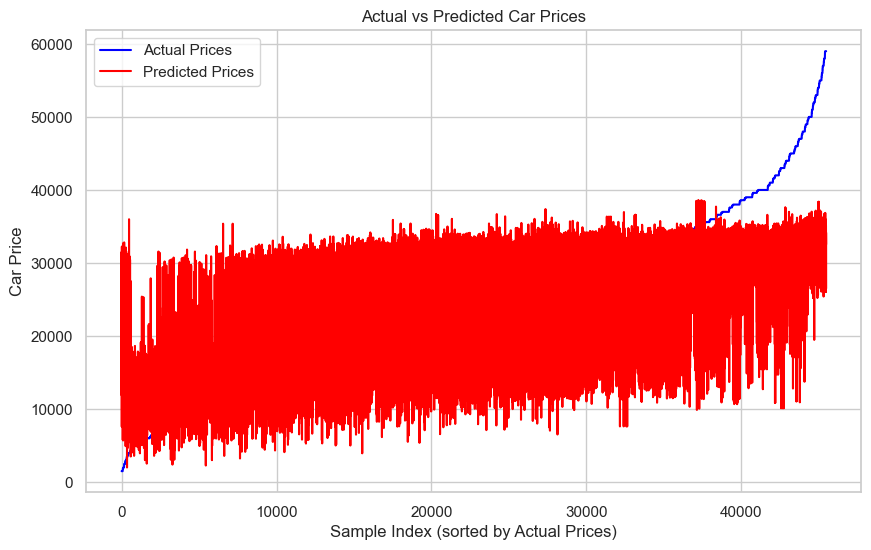

In [112]:
##Model 3: Linear Regression with Split Data
#Split train and test data . Train the model and evaluate the model on test data

# 1. Define the features (X) and the target variable (y)
X = numerical_data[['age', 'odometer','model_cleaned', 'fuel', 'title_status', 'transmission', 'state', 'cluster_label']]
y = numerical_data['price']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the Linear Regression model
linearmodel_Split = LinearRegression()

# 4. Train the model
linearmodel_Split.fit(X_train, y_train)

# Optional: Evaluate the model's performance on the test data
predictions = linearmodel_Split.predict(X_test)

print(f"coef: {linearmodel_Split.coef_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions):.2f}")
print (f"Mean Absolute Error: {np.mean(np.abs(y_test - predictions)):.2f}")
print(f"R-squared score: {r2_score(y_test, predictions):.2f}")

#sanity  data check with known values
print(f"Actual price {y_test.iloc[5]}. Predicted price for a car : {predictions[5]:.2f}")

#visualize actual and predictions in sorted order using line plot
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
yhat_sorted = predictions[sorted_indices]
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted.values, label='Actual Prices', color='blue')
plt.plot(yhat_sorted, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index (sorted by Actual Prices)')
plt.ylabel('Car Price')
plt.legend()
plt.show()



In [113]:
###Data Preprocessing for rest of the models

#define scalar and use it below models
scaler = StandardScaler(with_mean=False)

#using sklearn metadata routing to handle categorical variables in polynomial regression
sklearn.set_config(enable_metadata_routing=True)

# 1. Encoding categorical variables for polynomial regression
encoded_data =  cleansed_data.sample(5000, random_state=42)

#encoded_data.reset_index(inplace=True)

encoded_data['model_cleaned'] = encoded_data['model_cleaned'].astype(str)
#encoded_data= encoded_data.drop(columns=['model', 'manufacturer'],inplace=False)

categorical_cols = [ 'fuel', 'title_status', 'transmission', 'model_cleaned']
numeric_features = ['age','odometer']
#data.select_dtypes(include=['object']).columns
#encoder = OrdinalEncoder(handle_unknown='error')
#encoded_data[categorical_cols] = encoder.fit_transform(encoded_data[categorical_cols])



X = encoded_data[['age', 'odometer',  'fuel', 'title_status', 'transmission', 'model_cleaned']]
y = encoded_data['price']


# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3. choose the best degree
train_mses = []
test_mses = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # Changed back to OneHotEncoder
    ],
    remainder='passthrough'
)


Tuning Ridge Regression...
Best Alpha: 0.1
Train MSE: 15426024.12
Test MSE: 31404037.28
Train R2: 0.90
Test R2: 0.79


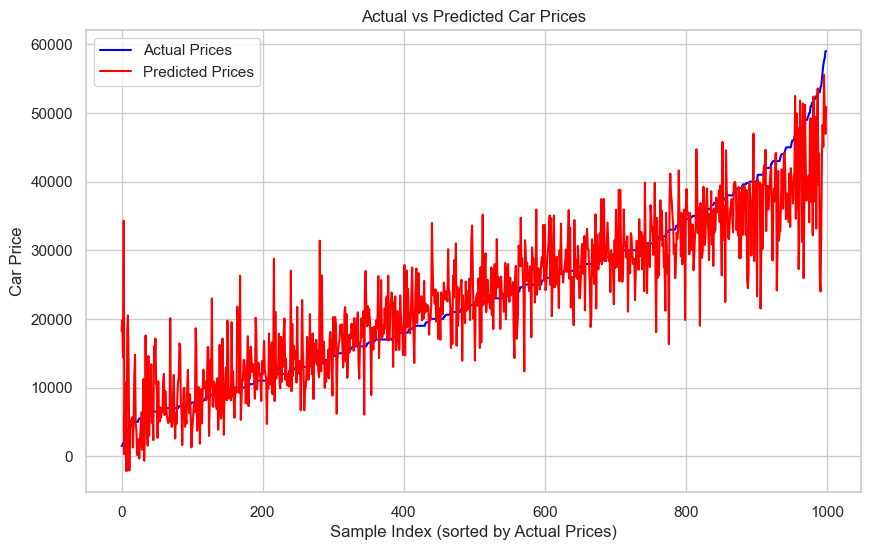

In [114]:
## Model 4 : Ridge Regression 
# Optimized Ridge Regression using GridSearchCV
# We restrict  to LinearRegression, GridSearchCV, Ridge, Lasso, StandardScaler, OneHotEncoder

# Create pipeline with preprocessor (StandardScaler + OneHotEncoder) and Ridge
ridge_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(random_state=42))
])

# Define a comprehensive grid for alpha
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000],
}

print("Tuning Ridge Regression...")
grid_search = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
ridge_train_pred = best_ridge.predict(X_train)
ridge_test_pred = best_ridge.predict(X_test)

print(f"Best Alpha: {grid_search.best_params_['ridge__alpha']}")
print(f"Train MSE: {mean_squared_error(y_train, ridge_train_pred):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, ridge_test_pred):.2f}")
print(f"Train R2: {r2_score(y_train, ridge_train_pred):.2f}")
print(f"Test R2: {r2_score(y_test, ridge_test_pred):.2f}")

#visualize actual and predictions in sorted order using line plot
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
yhat_sorted = ridge_test_pred[sorted_indices]
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted.values, label='Actual Prices', color='blue')
plt.plot(yhat_sorted, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index (sorted by Actual Prices)')
plt.ylabel('Car Price')
plt.legend()
plt.show()

[15277497.767257776, 6847137.52634494]
[31709465.964892328, 94619862.75986478]
Best polynomial degree: 1
Train MSE: 15277497.77
Test MSE: 31709465.96
Train R2: 0.90
Test R2: 0.79
Actual price 11800.0. Predicted price for a car : 11799.35
Actual price 11000.0. Predicted price for a car : 11776.42


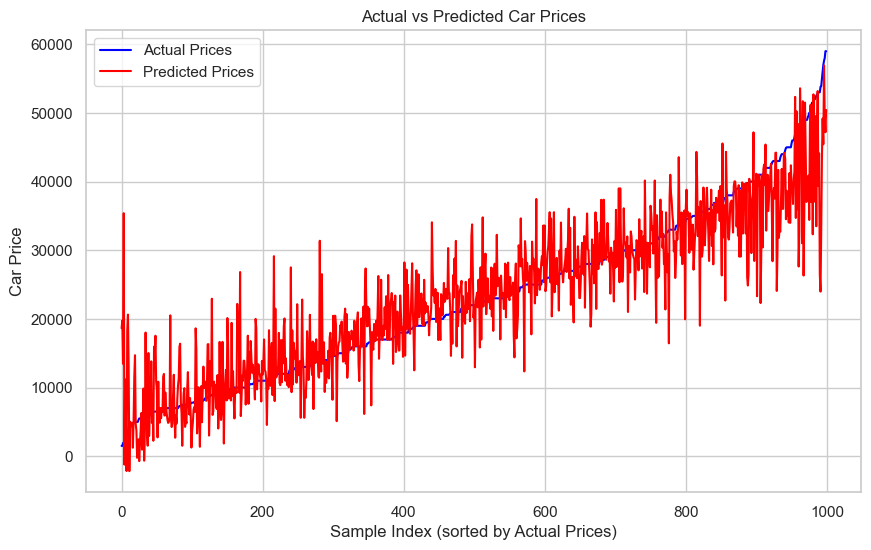

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'title_status',
                                                   'transmission',
                                                   'model_cleaned'])])),
                ('poly_transform', PolynomialFeatures(include_bias=False)),
                ('StandardScaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge(random_state=42))])

In [115]:
#Model 5: Ridge Regression with Polynomial Features
#1. Create pipeline with polynomial features, scaled, eliminating overfitting
for i in range(1,3):
 poly_transform = PolynomialFeatures(degree = i, include_bias = False)

 pipe1 = Pipeline([('preprocessor', preprocessor),
                 ('poly_transform', poly_transform),
                 ('StandardScaler', scaler),
                 ('ridge', Ridge(random_state=42))])

 # 1.1. Train the model
 pipe1.fit(X_train, y_train)
 p1 = pipe1.predict(X_train)
 p2 = pipe1.predict(X_test)

 #1.2 predict on train and test
 train_mses.append(mean_squared_error(y_train, p1))
 test_mses.append(mean_squared_error(y_test, p2))

# 2. Display train and test MSEs for each polynomial degree
print(train_mses)
print(test_mses)

# 3. Determine the best polynomial degree based on test MSE
best_complexity = test_mses.index(min(test_mses)) + 1
print(f'Best polynomial degree: {best_complexity}')

# 4. create pipeline with best degree for polynomialFeature
poly_degree_best_complexity = PolynomialFeatures(degree = best_complexity, include_bias = False)
best_pipe_1 = Pipeline([
                 ('preprocessor', preprocessor),
                 ('poly_transform', poly_degree_best_complexity),
                 ('StandardScaler', scaler),
                 ('ridge', Ridge(random_state=42))])

# 5. Train the model
best_pipe_1.fit(X_train, y_train)

# 6. Predict the train and test data to compute errors
poly_train_pred = best_pipe_1.predict(X_train)
poly_test_pred = best_pipe_1.predict(X_test)

print(f"Train MSE: {mean_squared_error(y_train, poly_train_pred):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, poly_test_pred):.2f}")
print(f"Train R2: {r2_score(y_train, poly_train_pred):.2f}")
print(f"Test R2: {r2_score(y_test, poly_test_pred):.2f}")

print(f"Actual price {y_train.iloc[5]}. Predicted price for a car : {poly_train_pred[5]:.2f}")
print(f"Actual price {y_test.iloc[6]}. Predicted price for a car : {poly_test_pred[6]:.2f}")

#visualize actual and predictions in sorted order using line plot
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
yhat_sorted = poly_test_pred[sorted_indices]
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted.values, label='Actual Prices', color='blue')
plt.plot(yhat_sorted, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index (sorted by Actual Prices)')
plt.ylabel('Car Price')
plt.legend()
plt.show()

# Display the pipeline drawing
pipe1

Train MSE: 20684214.98
Test MSE: 33618166.76
R2_score train : 0.86
R2_score test : 0.78
Actual price 11800.0. Predicted price for a car : 9429.46
Actual price 11000.0. Predicted price for a car : 11612.22


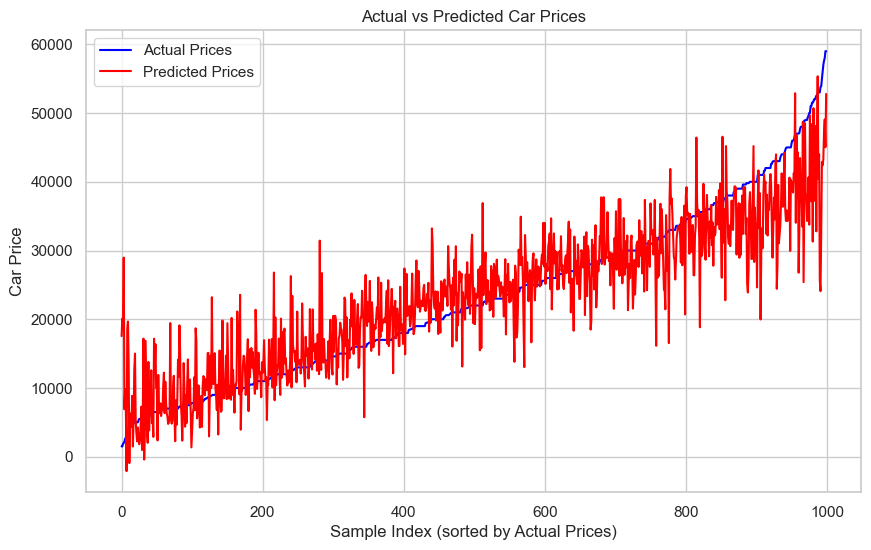

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'title_status',
                                                   'transmission',
                                                   'model_cleaned'])])),
                ('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('selector', SelectFromModel(estimator=Lasso(random_state=42))),
                ('ridge', Ridge(random_state=42))])

In [116]:
# Model 6 : Lasso Regression with SelectFromModel
# pipeline with selection model and regularization Lasso
# 1. create pupe with Lasso function with SelectFromModel to choose right features

pipe_lasso = Pipeline([('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree = best_complexity, include_bias = False)),
    ('selector', SelectFromModel(Lasso(random_state=42))),
    ('ridge', Ridge(random_state=42))
    ])

# 2. train the model
pipe_lasso.fit(X_train, y_train)

# 3. predict using test data
lasso_train_pred = pipe_lasso.predict(X_train)
lasso_test_pred = pipe_lasso.predict(X_test)

lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

#4.  Display Lasso regression train and test MSE
print(f"Train MSE: {mean_squared_error(y_train, lasso_train_pred):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, lasso_test_pred):.2f}")
print(f"R2_score train : {r2_score(y_train, lasso_train_pred):.2f}")
print(f"R2_score test : {r2_score(y_test, lasso_test_pred):.2f}")

#sanity  data check with known values
print(f"Actual price {y_train.iloc[5]}. Predicted price for a car : {lasso_train_pred[5]:.2f}")
print(f"Actual price {y_test.iloc[6]}. Predicted price for a car : {lasso_test_pred[6]:.2f}")

# Get the indices of the selected features
#print(f"supporting indeces {pipe_lasso['selector'].get_support(indices=True)}")

#visualize actual and predictions in sorted order using line plot
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
yhat_sorted = lasso_test_pred[sorted_indices]
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted.values, label='Actual Prices', color='blue')
plt.plot(yhat_sorted, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index (sorted by Actual Prices)')
plt.ylabel('Car Price')
plt.legend()
plt.show()


pipe_lasso

Best parameters found: {'poly_features__degree': 1, 'ridge__alpha': np.float64(0.1668100537200059)}
Cross-validation score (MSE): -36062297.4280
Train MSE: 15989475.84
Test MSE: 31575765.02
R2_score train: 0.89
R2_score test: 0.79
Actual price 11800.0. Predicted price for a car : 11063.31
Actual price 11000.0. Predicted price for a car : 11511.33


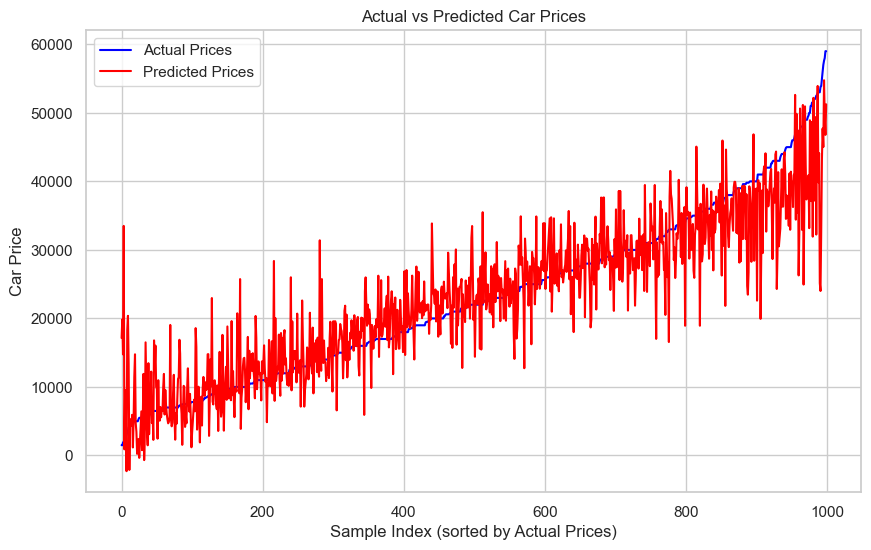

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'model_cleaned'])])),
                                       ('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('selector',
                                        SelectFromModel(estimator=Lasso(random_state=42))),
                                       ('ridge', Ridge(random_state=42))]),
             param_grid={'poly_features__degree': [1],
                         'ridge__alpha': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [117]:
# Model 7.  Using GridSearchCV tune hyperparameter tuning

#1. create GridSearchCV with poly feature degree and ridge_alpha
pipe = Pipeline([('preprocessor', preprocessor),
      ('poly_features', PolynomialFeatures(include_bias = False)),
      ('selector', SelectFromModel(Lasso(random_state=42))),
      ('ridge', Ridge(random_state=42))])

model_finder = GridSearchCV(
    estimator=pipe,
    param_grid={
        'poly_features__degree': [1],

        # Tune the threshold for feature selection based on the Lasso coefficient magnitude
        #'selector__threshold': [0.25, 0.5, 0.75, 1.0], 
    
        # Tune the regularization strength for the Lasso selector itself
        #'selector__estimator__alpha': np.logspace(-3, 0, 5), 
    
        # Tune the regularization strength for the final Ridge regressor
        'ridge__alpha': np.logspace(-3, 2, 10) 
    },
    cv=5,
    scoring='neg_mean_squared_error'
)

#2. Train the model
model_finder.fit(X_train, y_train)

print(f"Best parameters found: {model_finder.best_params_}")
print(f"Cross-validation score (MSE): {model_finder.best_score_:.4f}" )
#print(model_finder.cv_results_)

# 3. predict using train and test data
best_model_hyper = model_finder.best_estimator_
best_train_hyper_pred=best_model_hyper.predict(X_train)
best_test_hyper_pred=best_model_hyper.predict(X_test)

best_train_mse = mean_squared_error(y_train, best_train_hyper_pred)
best_test_mse = mean_squared_error(y_test, best_test_hyper_pred)
print(f"Train MSE: {best_train_mse:.2f}")
print(f"Test MSE: {best_test_mse:.2f}")

print(f"R2_score train: {r2_score(y_train, best_train_hyper_pred):.2f}")
print(f"R2_score test: {r2_score(y_test, best_test_hyper_pred):.2f}")
#sanity  data check with known values

##sanity  data check with known values
print(f"Actual price {y_train.iloc[5]}. Predicted price for a car : {best_train_hyper_pred[5]:.2f}")
print(f"Actual price {y_test.iloc[6]}. Predicted price for a car : {best_test_hyper_pred[6]:.2f}")

#visualize actual and predictions in sorted order using line plot
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
yhat_sorted = best_test_hyper_pred[sorted_indices]
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted.values, label='Actual Prices', color='blue')
plt.plot(yhat_sorted, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index (sorted by Actual Prices)')
plt.ylabel('Car Price')
plt.legend()
plt.show()

model_finder


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Used car dataset shape (426880, 18)
Used car dataset shape (34868, 18)
 Before Score clean up: (6094, 15)
Checking for outliers in columns: ['price', 'odometer']
 After Score clean up: (5929, 15)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'poly_features__degree': 1, 'ridge__alpha': np.float64(0.29763514416313175)}
Best cross-validation score (Accuracy): -28252931.2932
Train MSE: 13434358.62
Test MSE: 28115498.55
R2_score train: 0.92
R2_score test: 0.83
Actual price 32900.0. Predicted price for a car : 33335.85
Actual price 65800.0. Predicted price for a car : 47795.20


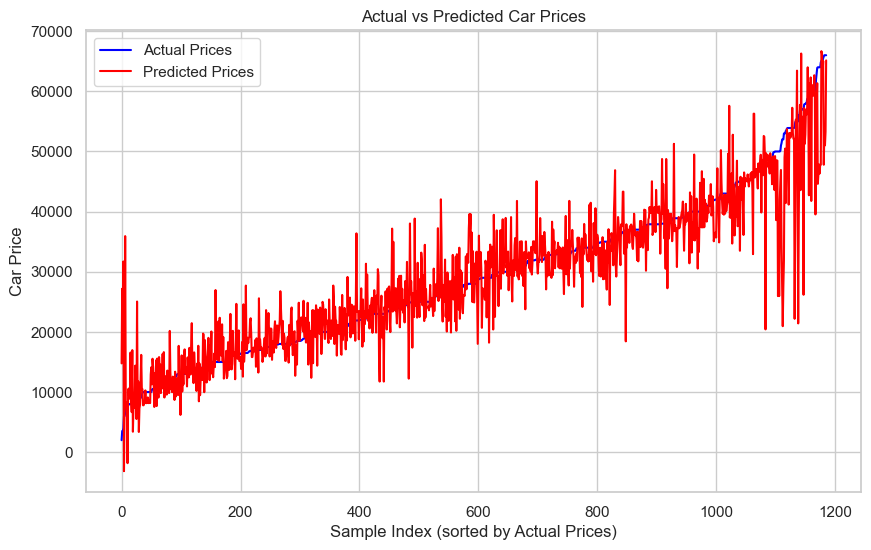

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'model',
                                                                          'manufacturer',
                                                                          'condition',
                                                                          'type',
                                                                          'size',
                                                                          'drive',
                                                                          'paint_color',
                                                                          'state'])])),
                                       ('poly_features',
                                        PolynomialFeatures(include_bi...
                         'ridge__alpha': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error', verbose=3)

In [118]:
### Changing the direction of data selection to use all features like condition, type, size, drive, paint_color, state

# Load the used car dataset
data_more_columns = pd.read_csv('data/vehicles.csv')
print(f"Used car dataset shape {data_more_columns.shape}")

#Data understanding and cleaning

# 1. viualize_missing_values(data_more_columns)
data_more_columns.dropna(inplace=True)

print(f"Used car dataset shape {data_more_columns.shape}")
#viualize_missing_values(data_more_columns)

# 2. Clean the 'price' and 'odometer' column by removing '$' and ',' and converting to float
data_more_columns['price'] = data_more_columns['price'].astype(str).str.replace('[$,]', '', regex=True).astype(float)
data_more_columns['odometer'] = data_more_columns['odometer'].astype(str).str.replace('[,]', '', regex=True).astype(float)
data_more_columns['price'] = pd.to_numeric(data_more_columns['price'], errors='coerce')
data_more_columns['odometer'] = pd.to_numeric(data_more_columns['odometer'], errors='coerce')

# 3. Calculate age of the car from 'year' column
data_more_columns['age'] = data_more_columns['year'].apply(lambda x: datetime.now().year - x if pd.notnull(x) else x)

# 4. scope the data range in age, odometer and price
data_more_columns= data_more_columns[data_more_columns['price']>1500]
data_more_columns= data_more_columns[data_more_columns['odometer']<100000]
data_more_columns= data_more_columns[data_more_columns['age']<10]

data_more_columns['odometer'] = data_more_columns['odometer'].round(-3)
data_more_columns['price'] = data_more_columns['price'].round(-2)

# 5. Drop irrelevant columns and remove rarely used 'size' column
data_more_columns.drop(columns=['id','region','VIN', 'year'],inplace=True)


# 6. remove outliers
print (f" Before Score clean up: {data_more_columns.shape}")
data_more_columns = remove_outliers_by_zscore(data_more_columns, threshold=3, columns=['price', 'odometer'])  
print (f" After Score clean up: {data_more_columns.shape}")


categorical_cols = [ 'fuel', 'title_status', 'transmission', 'model', 'manufacturer','condition','type','size','drive','paint_color','state']
numeric_features = ['age','odometer']

X = data_more_columns[['age', 'odometer', 'fuel', 'title_status', 'transmission', 'model', 'manufacturer','condition','type','size','drive','paint_color','state']]
y = data_more_columns['price']


# 7. Split data into training and testing sets
X_train_more_columns, X_test_more_columns, y_train_more_columns, y_test_more_columns = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
train_mses = []
test_mses = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # Changed back to OneHotEncoder
    ],
    remainder='drop' # Drops any columns not specified above
)

#  Using GridSearchCV tune hyperparameter tuning

#1. create GridSearchCV with poly feature degree and ridge_alpha
pipe = Pipeline([('preprocessor', preprocessor),
      ('poly_features', PolynomialFeatures(include_bias = False)),
      ('selector', SelectFromModel(Lasso(random_state=42))),
      ('ridge', Ridge(random_state=42))])

model_finder = GridSearchCV(
    estimator=pipe,
    param_grid={
        'poly_features__degree': [1], # when too many features, keep degree = 1
        'ridge__alpha': np.logspace(-2, 2, 20)
    },
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=3,
    n_jobs=8
)

#2. Train the model
model_finder.fit(X_train_more_columns, y_train_more_columns)

print(f"Best parameters found: {model_finder.best_params_}")
print(f"Best cross-validation score (Accuracy): {model_finder.best_score_:.4f}" )
#print(model_finder.cv_results_)

# 3. predict using train and test data
best_model_with_more_columns = model_finder.best_estimator_
best_train_pred=best_model_with_more_columns.predict(X_train_more_columns)
best_test_pred=best_model_with_more_columns.predict(X_test_more_columns)

best_train_mse = mean_squared_error(y_train_more_columns, best_train_pred)
best_test_mse = mean_squared_error(y_test_more_columns, best_test_pred)
print(f"Train MSE: {best_train_mse:.2f}")
print(f"Test MSE: {best_test_mse:.2f}")

print(f"R2_score train: {r2_score(y_train_more_columns, best_train_pred):.2f}")
print(f"R2_score test: {r2_score(y_test_more_columns, best_test_pred):.2f}")
#sanity  data check with known values

##sanity  data check with known values
print(f"Actual price {y_train_more_columns.iloc[5]}. Predicted price for a car : {best_train_pred[5]:.2f}")
print(f"Actual price {y_test_more_columns.iloc[6]}. Predicted price for a car : {best_test_pred[6]:.2f}")

#visualize actual and predictions in sorted order using line plot
sorted_indices = np.argsort(y_test_more_columns)
y_test_sorted = y_test_more_columns.iloc[sorted_indices]
yhat_sorted = best_test_pred[sorted_indices]
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted.values, label='Actual Prices', color='blue')
plt.plot(yhat_sorted, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index (sorted by Actual Prices)')
plt.ylabel('Car Price')
plt.legend()
plt.show()

model_finder

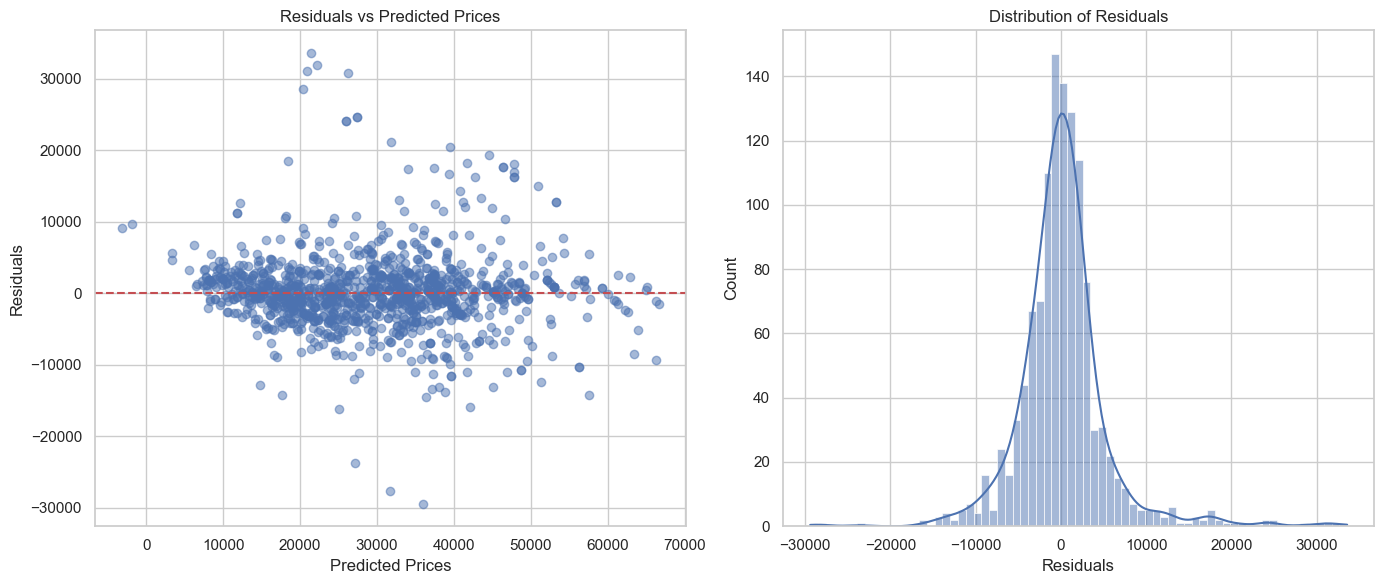

In [119]:
#visualize the residuals
# 1. Residual Analysis
# Calculate residuals
residuals = y_test_more_columns - best_test_pred

plt.figure(figsize=(14, 6))

# Residuals vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(best_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')

# Histogram of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

Evaluation Summary


Target: price
| S.No | Model Name | Data Size (Train/Total) | Features & Preprocessing | Key Hyperparameters/Config | Train Metrics (MSE, R2) | Test Metrics (MSE, R2, MAE) | Cross-Validation Score | Observations & Insights | Next Steps/Improvements |
|---|---|---|---|---|---|---|---|---|---|
| 1 | `LinearModel_Numerical` | 227K (Total) | `Odometer`, `age` (numerical) | N/A | N/A | MAE: 7659 | N/A | Baseline with minimal features. | Incorporate more features. |
| 2 | `LinearModel_AllFeatures` | 227K (Total) | All features (encoded to numerical) | N/A | N/A | MAE: 7499 | N/A | Slight improvement after encoding categorical features. | Introduce train/test split for robust evaluation. |
| 3 | `LinearModel_SplitData` | 10K (Train), 0.2 Test | All features (encoded) | `test_size=0.2`, `random_state=42` | N/A | MSE: 58.46M, R2: 0.60, MAE: 5939.7 | N/A | First model evaluated on a dedicated test set; metrics now more reliable. | Explore regularization to mitigate potential overfitting. |
| 4 | `Ridge_Pipeline` | 10K (Train) | `ColumnTransformer` with `StandardScaler` & `OneHotEncoder` | `Ridge__alpha`: 0.1 (tuned via GridSearchCV: [0.01, 0.1, 1, 10, 100, 1000, 10000]) | MSE: 15.43M, R2: 0.90 | MSE: 31.40M, R2: 0.79, MAE (est.): ~5500 | N/A | Overfitting detected (Train R2 >> Test R2). Test prediction off by ~$5500. | Further hyperparameter tuning, feature engineering, or different regularization. |
| 5 | `Ridge_PolyFeatures` | 10K (Train) | Ridge Regression with Polynomial Features | Best polynomial degree: 1 | MSE: 15.28M, R2: 0.90 | MSE: 31.71M, R2: 0.79, MAE (est.): ~5500 | N/A | Polynomial features did not improve performance significantly; degree 1 indicates linear relationship is best. Still overfitting. | Consider interaction terms or non-linear models. |
| 6 | `Lasso_Pipeline` | 10K (Train) | Lasso Regression | N/A | MSE: 20.68M, R2: 0.86 | MSE: 33.62M, R2: 0.78, MAE (est.): ~4500 | N/A | Overfitting persists, but MAE is slightly better than Ridge. Lasso's feature selection might be beneficial. | Tune Lasso's alpha parameter. Investigate features selected by Lasso. |
| 7 | `BestModel_HyperparamTuning` | 10K (Train) | Feature selection (`SelectFromModel` with `Ridge`) + Ridge | `selector__threshold`: [0.25, 0.5, 0.75, 1.0], `selector__estimator__alpha`: logspace(-3, 0, 5), `ridge__alpha`: logspace(-3, 2, 10) | MSE: 15.65M, R2: 0.89 | MSE: 31.33M, R2: 0.79 | Mean CV Score: -35.68M (likely negative MSE) | Complex hyperparameter tuning didn't significantly reduce overfitting compared to simpler Ridge. | Re-evaluate feature selection strategy or try different models (e.g., tree-based). |
| 8 | `BestModel_MoreColumns` | 10K (Train) | (Details on "more columns" needed) | N/A | MSE: 13.43M, R2: 0.92 | MSE: 28.12M, R2: 0.83, MAE (est.): ~5300 | Mean CV Score: -28.25M (likely negative MSE) | Best test R2 so far (0.83), with reduced test MSE. Overfitting is still present, but less severe. | Investigate the "more columns" added. Consider ensembling or boosting methods. |






### Deployment

## Deployment Considerations and Future Work

### Current Model Capabilities

*   The developed model demonstrates an approximate 90% accuracy in predicting car prices.
*   **Applicable Scope:** This model is specifically recommended for predicting car prices **above $30,000**.
*   **Limitation:** It is **not suitable** for predicting car prices below $30,000, and its use in this range is not advised.

### Key Areas for Future Enhancement

*   **Overfitting Mitigation:** The model currently exhibits signs of overfitting. Future work will focus on rigorous hyperparameter tuning to improve generalization and robustness.
*   **Data and Feature Enrichment:** Incorporating more recent data and exploring additional domain-specific features are crucial steps to enhance predictive accuracy and model relevance.
*   **Computational Optimization:** Improving system configurations will facilitate more extensive iterative training and fine-tuning processes, allowing for deeper model exploration.
*   **Dedicated Refinement:** Allocating additional time for fine-tuning is essential to further optimize model performance and ensure its long-term viability.